# **CAPSTONE PROJECT 3**

## **Business Problem Understanding**

### **Context**

[Syarah.com](https://syarah.com/) is one of the biggest online based platform marketplace from Saudi Arabia that are specialized in the sale and purchase of new and used cars. The website offers a variety of vehicles, including sedans, SUVs, trucks, and more. It also provides users with detailed information on the cars available, including specifications, prices, year release, and sometimes you can negotiate the price. Syarah itself acts as a third party business company for promoting in selling new and used cars, providing business or individual to buy their cars.

### **Problem Statement**

With that, it is crucial to recognize that setting the right selling price for cars is vital to the company's success. A business like Syarah needs to continuously monitor market trends and adjust prices accordingly to remain relevant and profitable. 

If the prices listed on the platform are not aligned with the market, it can have several negative impacts on the business:
1. Customer Trust
    * If the car is too high-priced, the customer will seek a cheaper alternative, leading to a decrease of customer's trust and damaging company's reputation.
    * If the car is too low-priced, it might create concern about quality of the products and the legitimacy of the marketplace.
1. Market Competitiveness
    * If competitors offer similar cars at better prices, Syarah may lose its competitive edge, leading to a decline in market share.
1. Customer Satisfaction and Retention
    * Poor pricing strategies can result in negative reviews and customer churn. While fair and competitive pricing can lead to higher customer satisfaction
1. Inventory Turnover
    * Overpriced cars may remain unsold for extended periods, leading to inventory turnover.
    * Underpriced cars might increase sales volume, but it can also reduce the profit margin and potentially lead to stock shortages.
1. Profitability
    * Pricing too low can erode profits, while pricing too high can reduce sales volume, both of which can negatively impact the profitability.

As the owner of Syarah, maintaining accurate and market-aligned pricing is essential not only for operational success but also for sustaining **customer trust**, **competitiveness**, and **overall profitability**. Hence why, the problem that can be found is:

**How can Syarah help a seller to maintain accurate and market-aligned a right selling price based on the specifications of the car?**

### **Goals**

As a Data Scientist, we need to recommend the best and appropriate machine learning model to help Syarah as a business. This machine learning model will be used as a **tool** to improve operations, customer experience, and profitability. Therefore, the goal is to:

1. **Make an analysis of dataset distribution and dataset features to target (price).**
1. **Make an appropriate machine learning model to determine the right selling price of a car.**

### **Analytic Approach**

Since we are going to predict the right selling price, we are going to use Supervised Machine Learning, **Regression Analysis** approach. Regression analysis is perfect to model the relationships between a dependent variable (price) and one or more independent variables (region, make, model of car, year, and mileage). Proper application of regression analysis, with attention to its assumptions and limitations, can yield robust and meaningful results in a wide range of fields.

### **Metric Evaluaton**

For metric evaluation from regression analysis, we are going to use **MAE** and **MAPE** as measure of prediction accuracy.
1. Mean Absolute Error (MAE)

    Mean Absolute Error (MAE) represents the average of the absolute differences between the predicted values and the actual values. MAE gives an idea of how close the predictions are to the actual outcomes, with lower values indicating better predictive accuracy.
    
$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$$

2. Mean Absolute Percentage Error (MAPE)

    Mean Absolute Percentage Error (MAPE) expresses the error as a percentage of the actual values. MAPE is useful when you want to understand the error relative to the scale of the data, which allows for easier comparisons across different datasets or models.

$$\text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|$$

While **MAE** gives the **average absolute error** in the same units as the data, **MAPE** gives the **average percentage error**, making it easier to interpret the accuracy in relative terms. MAE is more straightforward and less sensitive to outliers.

## **Data Understanding**

### **Data Summary**

The dataset contains 5624 records of used cars collected from [syarah.com](https://syarah.com/). Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.

|No.|Column Name|Data Type|Description|
|-|-|-|-|
|1.|Type|object|Type of used car|	
|2.|Region|object|The region in which the used car was offered for sale|
|3.|Make|object|The company name|
|4.|Gear_Type|object|Gear type size of used car|
|5.|Origin|object|Origin of used car
|6.|Options|object|Options of used car
|7.|Year|int|Manufacturing year
|8.|Engine_Size|float|The engine size of used car
|9.|Mileage|int|Mileage of used car (In kilometer)
|10.|Negotiable|bool|True if the price is 0, that means it is negotiable
|11.|Price|int|Used car price (In Saudi Arabia Riyal)

### **Initial Setup**

In [1]:
# Data Manipulation
import numpy as np            
import pandas as pd                  

# Visualization
import matplotlib.pyplot as plt      
import seaborn as sns                

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV

# Encode and Scaler
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

# Model Algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

# Evaluation metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore") 

### **Data Read**

In [2]:
df=pd.read_csv('data_saudi_used_cars.csv')
display(df.head(),df.tail())
print(f'Data shape: {df.shape}')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000
5623,ES,Jeddah,Lexus,Automatic,Other,Full,2017,3.5,115000,True,0


Data shape: (5624, 11)


In [3]:
# Change Negotiable column from 'bool' into 'object'
df['Negotiable'] = np.where(df['Negotiable']==1, "Yes", "No")

In [4]:
# Dataset Info
pd.set_option('display.max_colwidth',1)
listItem=[]
for col in df.columns:
    listItem.append([
        col,                                                    # Data Feature
        df[col].dtype,                                          # Data Type
        df[col].isna().sum(),                                   # Null
        df[col].nunique(),                                      # Unique
        list(df[col].drop_duplicates().values)]                 # Unique Sample
    )

df_desc=pd.DataFrame(columns=['Data Feature', 'Data Type', 'null Value', 'Unique Value', 'Unique Sample'],
                     data=listItem)
df_desc

,Data Feature,Data Type,null Value,Unique Value,Unique Sample
0,Type,object,0,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,object,0,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,object,0,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,object,0,2,"[Manual, Automatic]"
4,Origin,object,0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0,3,"[Standard, Full, Semi Full]"
6,Year,int64,0,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,float64,0,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,int64,0,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,object,0,2,"[Yes, No]"


In [5]:
# Statistic Describe
print('Numerical Describe')
display(df.describe().astype('int64'))

Numerical Describe


,Year,Engine_Size,Mileage,Price
count,5624,5624,5624,5624
mean,2014,3,150923,53074
std,5,1,382835,70155
min,1963,1,100,0
25%,2012,2,38000,0
50%,2016,3,103000,36500
75%,2018,4,196000,72932
max,2022,9,20000000,850000


In [6]:
print('Categorical Describe')
display(df.describe(include='object'))

Categorical Describe


,Type,Region,Make,Gear_Type,Origin,Options,Negotiable
count,5624,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3,2
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,No
freq,269,2272,1431,4875,4188,2233,3828


From reading this dataset, we have found some unique discovery:
1. Does not have missing value.
1. Has 4 numerical variables and 7 categorical variables. 
    * Having more a categorical variable than numerical variable
1. Has a lowest price of 0 Riyal.
    * Some of product's price are still in a default of 0 Riyal because the product can still be negotiated. Although we as a data scientist still needs to determine the minimum price of said product. It will be possible if we create the machine learning model with the target of price.
1. Has a highest mileage of 20000000.
    * An almost impossible scenario of a car having a really high mileage of 20000000. It depends of the usage whether this car have been used for a professional drive-testing, or there's an error in data collection. Either way, if we look at `Mileage`'s Q1, Q2, and Q3 that have a significantly lower value, this 20000000 mileage is clearly an outlier.
1. Cars sold within this dataset are within year 1963 - 2022.

## **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) includes the summarizing, visualizing, and exploring datasets to understand their main characteristics and uncover patterns, trends, anomalies, or relationships of both **Numerical Variables** and **Categorical Variables**.

### **Numerical Variables**

#### **Data Distribution**

In [7]:
from scipy.stats import normaltest

numerical=[var for var in df.columns if df[var].dtypes not in ['object','bool']]
dist=[]

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(df[feature_name].dropna())
    
    if p_value > 0.05:
        distribution='Normally Distributed'
    else:
        distribution='Not Normally Distributed'
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,Year,2962.639568,0.000000e+00,Not Normally Distributed
1,Engine_Size,404.905103,1.191171e-88,Not Normally Distributed
2,Mileage,14798.942925,0.000000e+00,Not Normally Distributed
3,Price,3799.926292,0.000000e+00,Not Normally Distributed


This dataframe concludes that all of the numerical variables are not normally distributed. With that said, we also need to visualize these variables with histogram and boxplot to see the skewness and the distribution of numerical variables per frequency. 

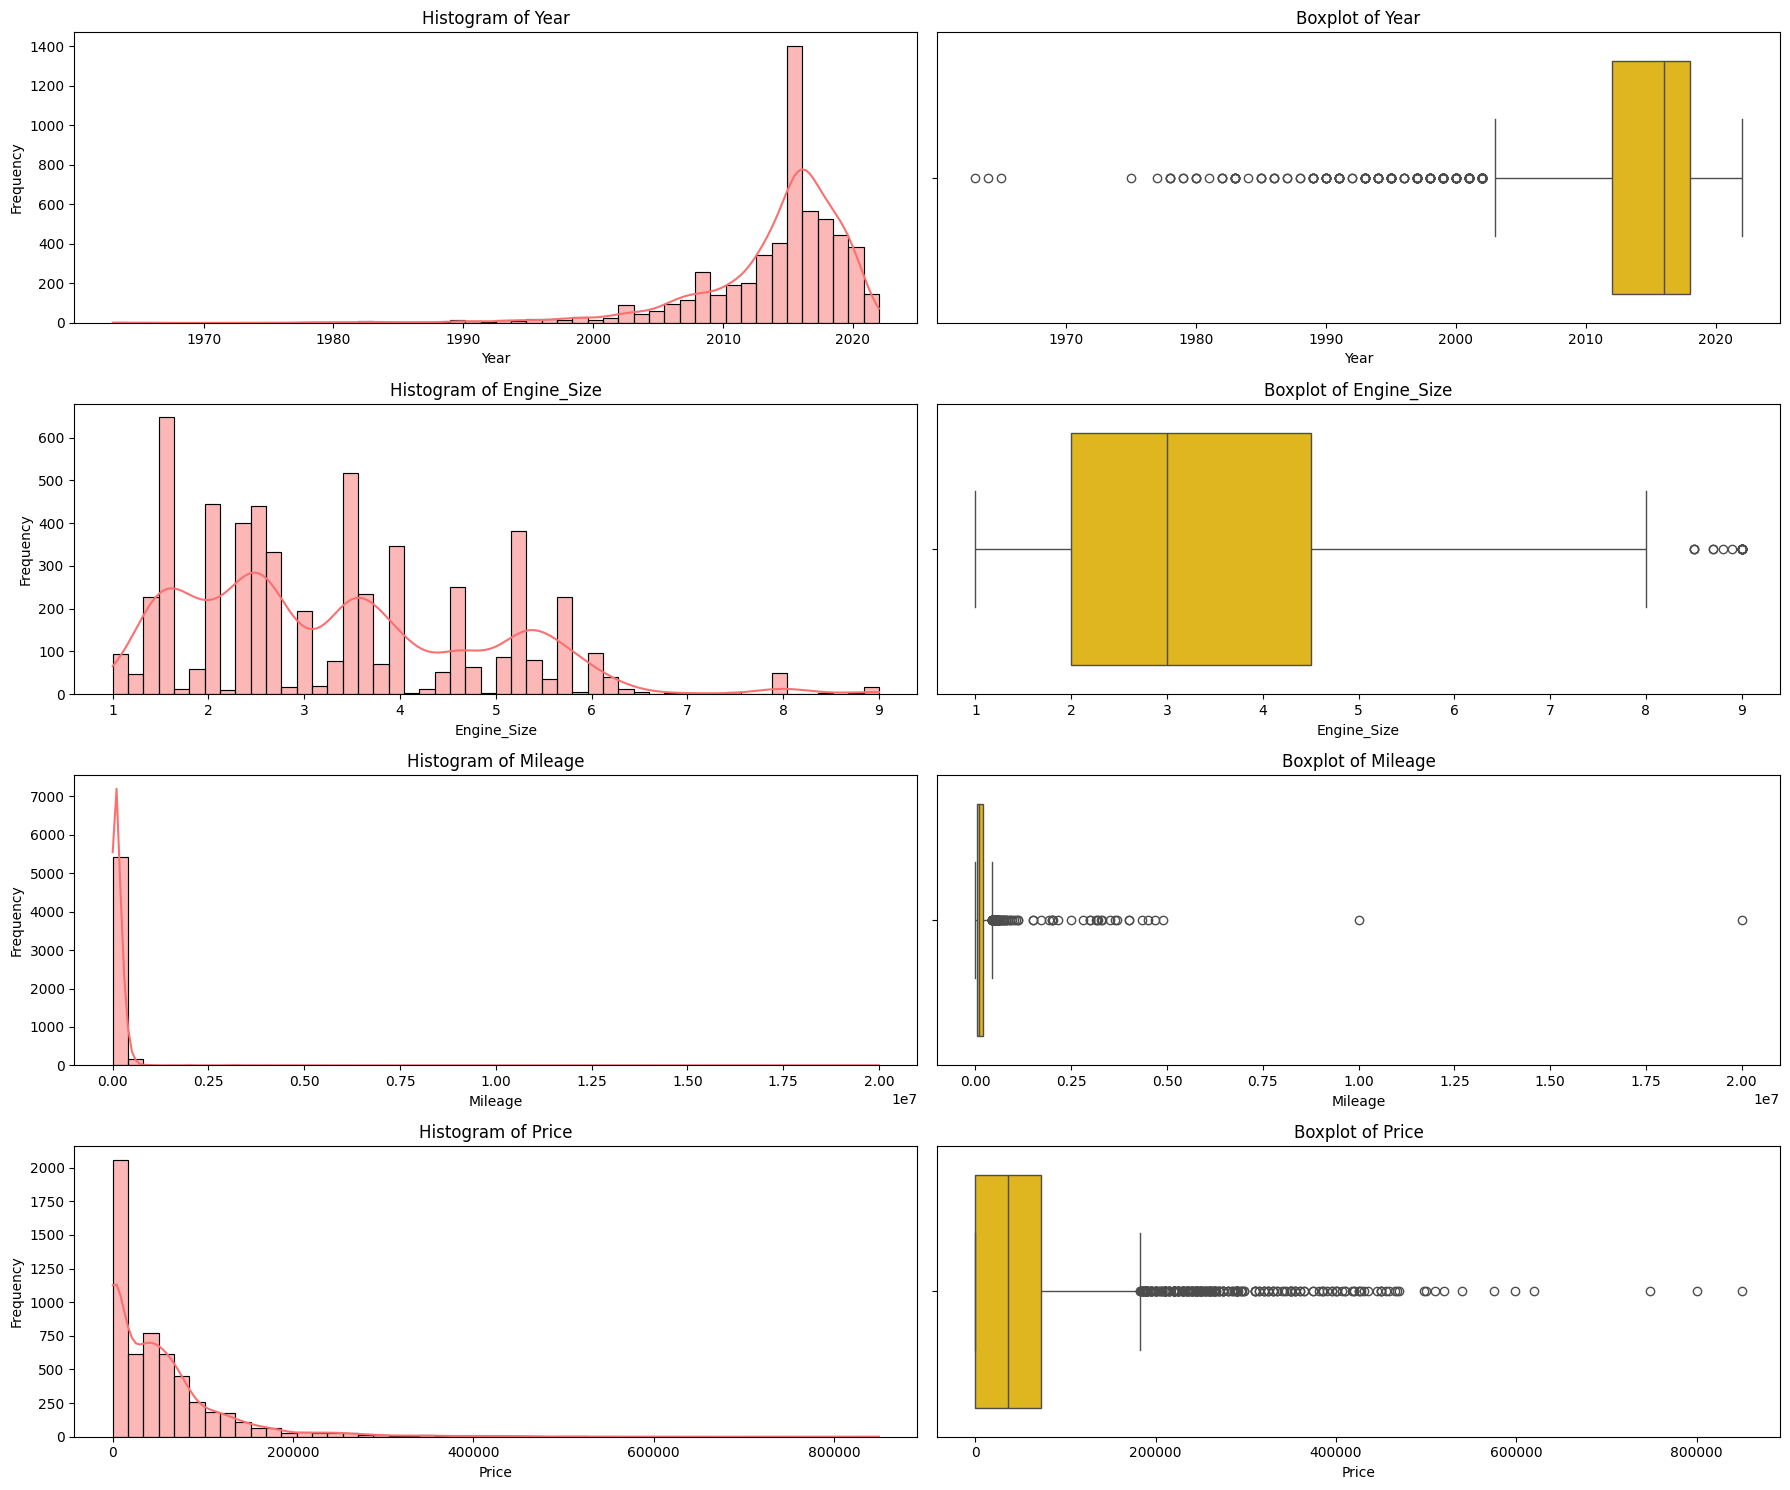

In [8]:
plt.figure(figsize=(18, 15))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(df[col], kde=True, color='#FA7070', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=df[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

With this data distribution, we can conclude that:
* Distribution of `Year` is left skewed:
    * Used cars sold trend started to increase at cars with a manufacturing year of 2000
    * Used cars that are mostly sold are cars with a manufacturing year range of 2010 - 2020 
    * It also can be interpreted as: the older the car, the less it sells
* Distribution of `Engine_Size` tend to be right skewed:
    * Used cars that are mostly sold are cars with a engine size 1 to 6
    * While the used cars that have engine size more than 6 are less sold 
* Distribution of `Mileage` is very right skewed:
    * Used cars that have lower mileage are more sold than higher mileage
* Distribution of `Price` is very right skewed:
    * Most distribution have a price value of 0
    * It has a maximum price of over 800.000 Riyal

#### **Heatmap Correlation**

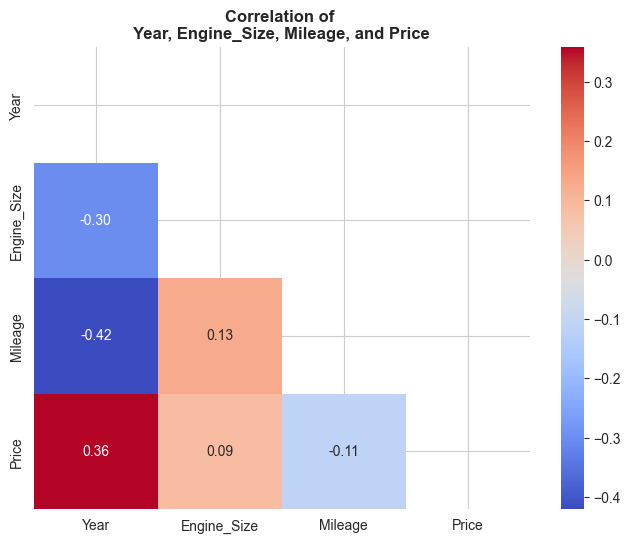

In [9]:
# Heatmap
df_numeric=df.select_dtypes('number').corr(method='spearman')
mask=np.triu(np.ones_like(df_numeric, dtype=bool))
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation of \nYear, Engine_Size, Mileage, and Price', fontsize=12, fontweight='bold')
plt.show()

All of the numerical variables does not have a strong correlation with each-other. It does have a mild negative and positive correlation, with:
* Mild negative correlation between `Mileage` and `Year`
* Mild negative correlation between `Engine_Size` and `Year`
* Mild positive correlation between `Price` and `Year`

Meaning that year the car was manufactured (`Year`) has everything to do with `Mileage`, `Engine_Size` and `Price` of a car.

#### **Numerical vs `Negotiable`**

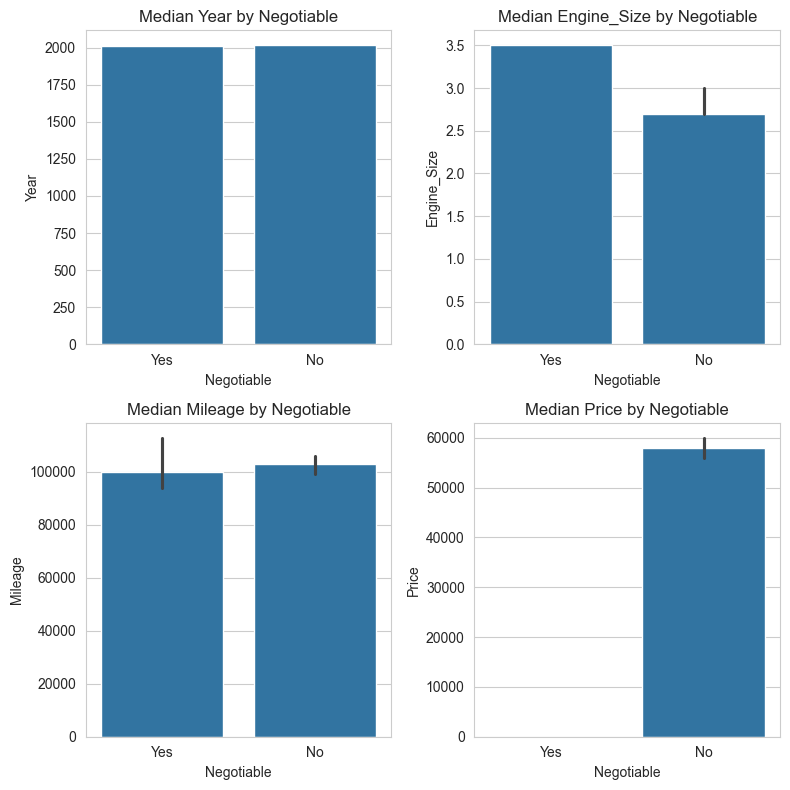

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for col, j in zip(numerical, axes.flatten()):
    ax = sns.barplot(data=df, y=col, x='Negotiable', estimator=np.median, ax= j)
    ax.set_title(f'Median {col} by Negotiable') 

plt.tight_layout()
plt.show()

From this distribution with `Negotiable`, we can conclude that:
* `Year` both have a median of year 2000, which means year of release does not exactly relate whether car can be negotiated or not 
* Used cars that have a higher `Engine_Size` usually can be negotiate rather than used cars that have a lower `Engine_Size`
* Used cars with higher `Mileage` usually cannot be negotiate than used cars with slightly lower `Mileage`
* In this dataset, cars that can be negotiate are in default set to 0 `Price`, while cars that cannot be negotiate are set with an actual price

### **Categorical Variables**

#### **Data Distribution**

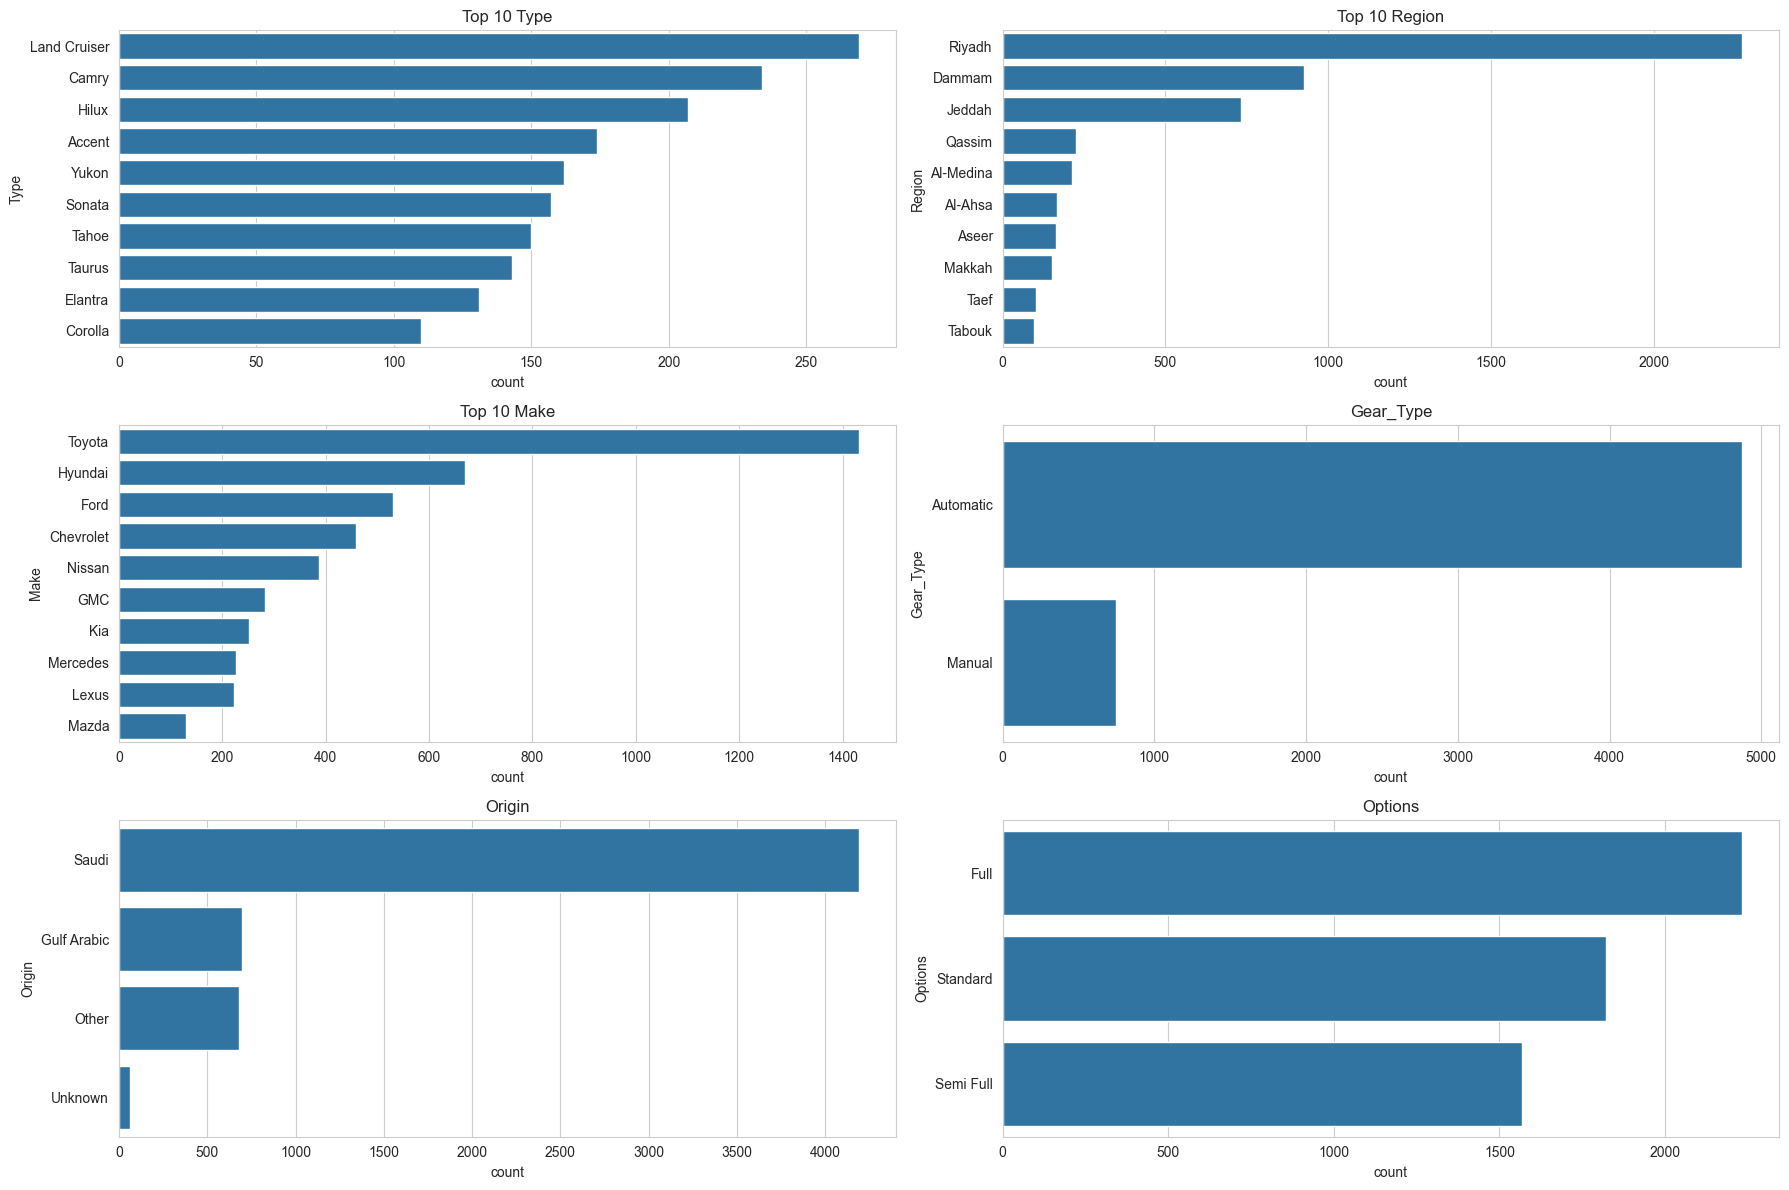

In [11]:
categorical=[var for var in df.columns if df[var].dtypes in ['object']]

fig, axes=plt.subplots(3, 2, figsize=(18, 12)) 
for i, j in zip(categorical, axes.flatten()):
    if i in ['Type', 'Region', 'Make']:
        # Top 10 most frequent
        top_10_values=df[i].value_counts().index[:10]
        ax=sns.countplot(data=df[df[i].isin(top_10_values)], y=i, ax=j, order=top_10_values)
        ax.set_title(f'Top 10 {i}', size=12)
    else:
        ax=sns.countplot(data=df, y=i, ax=j, order=df[i].value_counts().index)
        ax.set_title(f'{i}', size=12)
plt.tight_layout()
plt.show()

Based on this data distribution, we can conclude that:
* Used cars that are often sold are **Land Cruiser, Camry, and Hilux**. Higher preference for these models, indicating their popularity in the market.
* Region from **Riyadh** has a significantly higher number of used car listing than any region. This could suggest that Riyadh is a major hub for car sales, possibly due to its size, population, or economic activity.
* **Toyota** dominates the car market in terms of the number of listings, followed by **Hyundai** and **Ford**. The prevalence of Toyota may reflect its reliability, brand reputation, or market strategy in the region.
* **Automatic** gear type is overwhelmingly more common than **Manual** transmission. This indicate a consumer preference for automatic cars, which are generally easier to drive and are becoming more popular worldwide.
* Large portion of the cars are listed as originating from **Saudi**. It might indicate a preference for locally sourced vehicles, or it could simply reflect the dataset’s focus.
* **Full** option cars are the most common, followed by Standard and Semi Full. This suggest that comes with full set of features rather than **Standard** or **Semi-Full**

#### **`Negotiable` Variables**

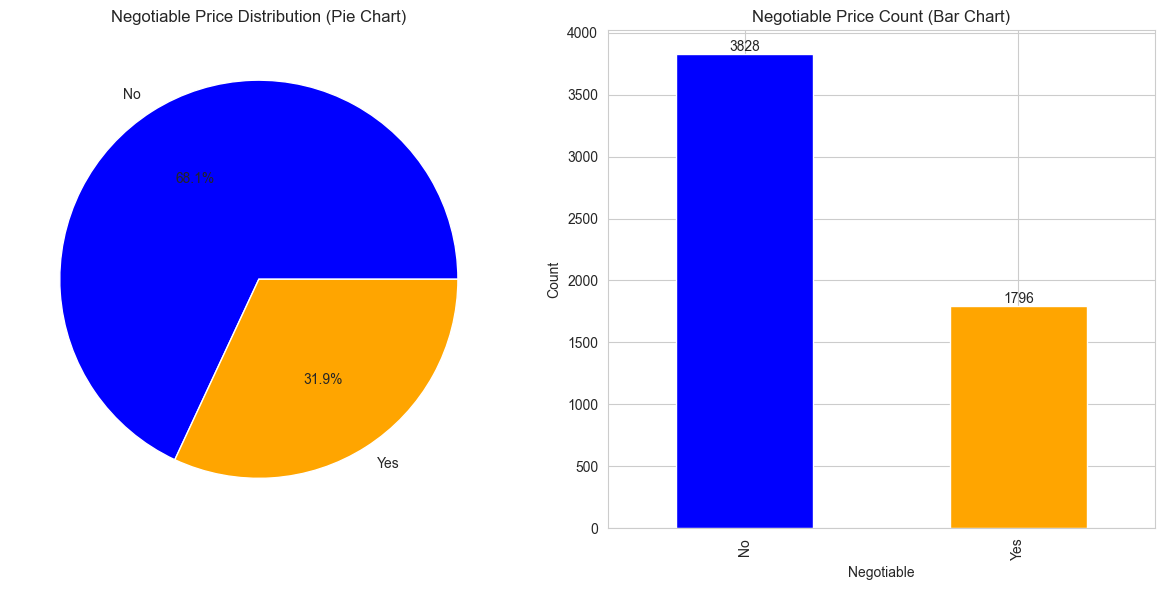

In [12]:
negotiable_counts=df['Negotiable'].value_counts()

# Pie chart
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(negotiable_counts, labels=negotiable_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Negotiable Price Distribution (Pie Chart)')

# Bar chart
plt.subplot(1, 2, 2)
ax=negotiable_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Negotiable Price Count (Bar Chart)')
plt.xlabel('Negotiable')
plt.ylabel('Count')

# Label
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.tight_layout()
plt.show()

From this data distribution, we can conclude that:
* The significant difference between the two categories (**Negotiable Yes** and **Negotiable No**) suggests that most sellers prefer to list their cars with fixed prices. Possibly indicating confidence in the value of their vehicles or a desire for quick, hassle-free transactions.
* A significant portion, nearly one-third of the listings, still have negotiable prices, which could appeal to buyers looking for a deal.

#### **Categorical vs `Negotiable`**

In [13]:
# Create a function for repeated use
def create_plot(data, col, x_maks=1000):
    if col in ['Type', 'Region', 'Make']:
        # Top 5 most frequent
        top_5_values = data[col].value_counts().index[:5]
        data = data[data[col].isin(top_5_values)]

    agg_table = data.groupby([col, 'Negotiable']).size().unstack().reset_index()
    agg_table['total'] = agg_table['Yes'] + agg_table['No']
    agg_table['% Negotiable'] = (agg_table['Yes'] / agg_table['total'] * 100).round(2)
    agg_table = agg_table.sort_values(by='% Negotiable', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    ax1 = sns.barplot(data=agg_table, y=col, x='% Negotiable', ax=axes[0], color='orange')
    label = ['{:.1f} %'.format(x) for x in ax1.containers[0].datavalues]
    ax1.bar_label(ax1.containers[0], labels=label, padding=3, label_type='center')
    if col in ['Type', 'Region', 'Make']:
        ax1.set_title(f'Percentage of Negotiable passengers by Top 5 {col}')
    else:
        ax1.set_title(f'Percentage of Negotiable passengers by {col}')

    ax2 = sns.countplot(data=data, y=col, hue='Negotiable', order=agg_table[col], ax=axes[1], palette={'Yes': 'orange', 'No': 'blue'})
    ax2.set_title(f'Number of sellers by {col} and negotiable')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)

    plt.tight_layout()
    plt.show()


**According to Top 5 `Type`**

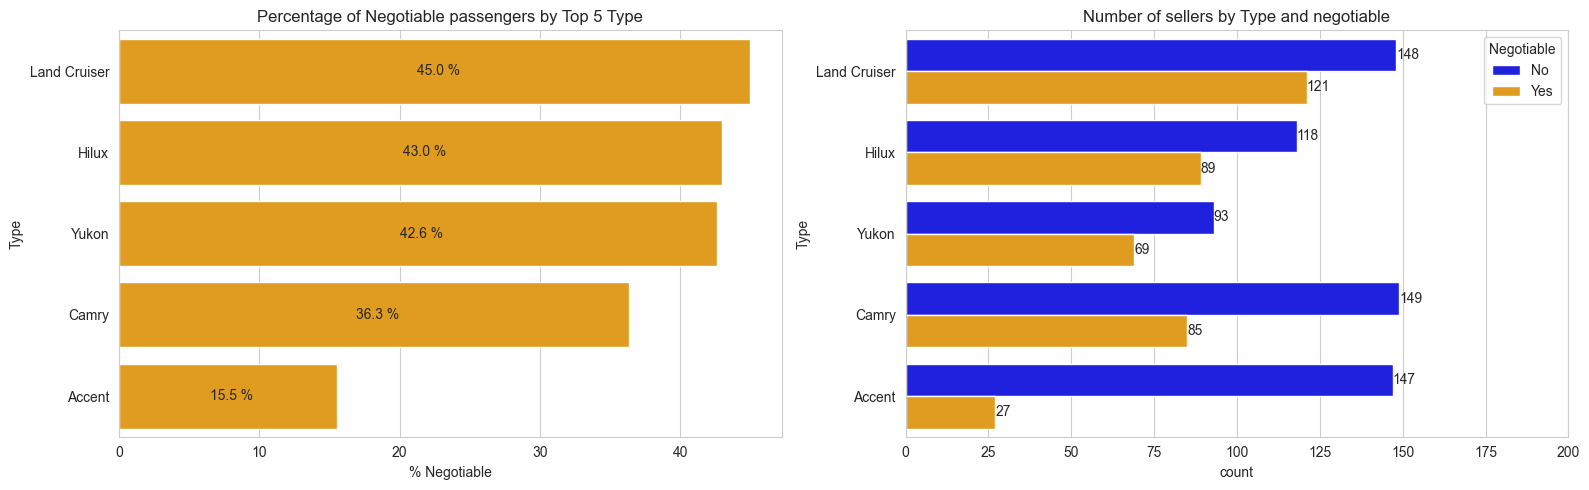

In [14]:
create_plot(df, 'Type', x_maks=200)

From this data distribution, we can conclude that:
* **Land Cruiser**, **Hilux**, and **Yukon** show a high willingness for price negotiation, making them attractive options for buyers who like to negotiate/haggle.
* **Camry** and especially **Accent** are more likely to have fixed prices, indicating that sellers of these types are less open to negotiation.
* It could be implied that in this market, buyers might be looking for negotiable deals might focus on the **Land Cruiser**, **Hilux**, and **Yukon** models.

**According to Top 5 `Region`**

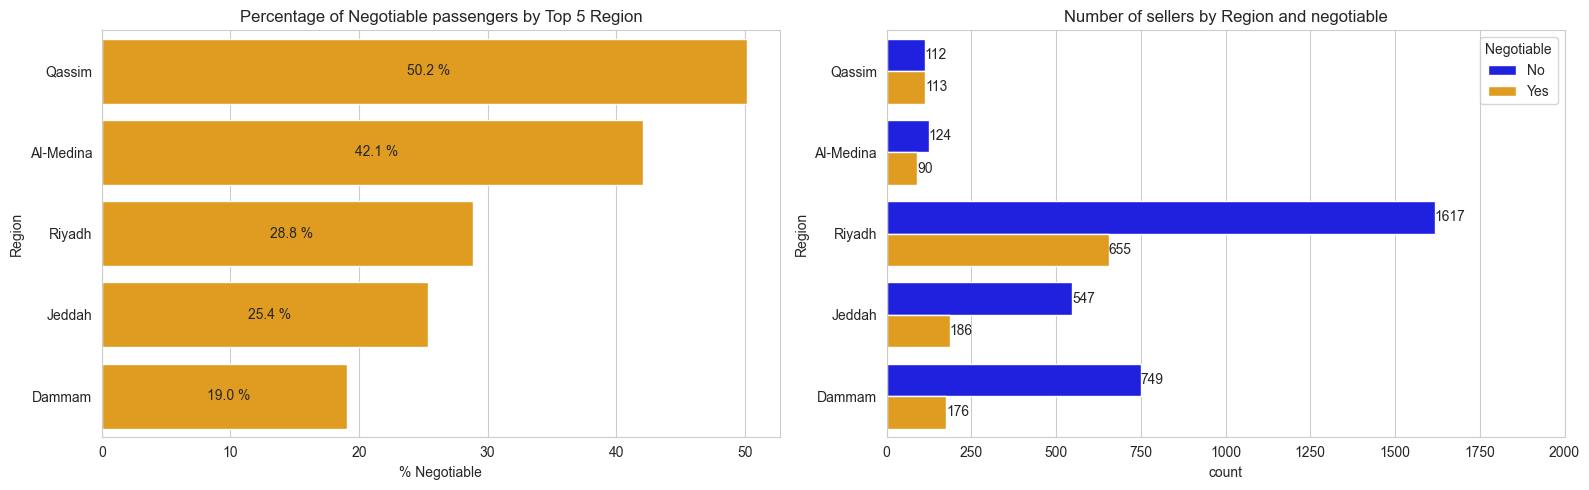

In [15]:
create_plot(df, 'Region', x_maks=2000)

From this data distribution, we can conclude that:
* Region **Qassim** and **Al-Medina** show a high willingness for price negotiation
* While region **Riyadh**, **Jeddah**, and **Dammam** are more likely to have fixed prices.
* **Riyadh** has the highest number of passengers overall, with a large number of non-negotiable passengers (1617) compared to negotiable passengers (655).
* This suggests that the negotiability of passengers varies significantly by region, and strategies for engagement might need to be tailored based on these regional differences.


**According to Top 5 `Make`**

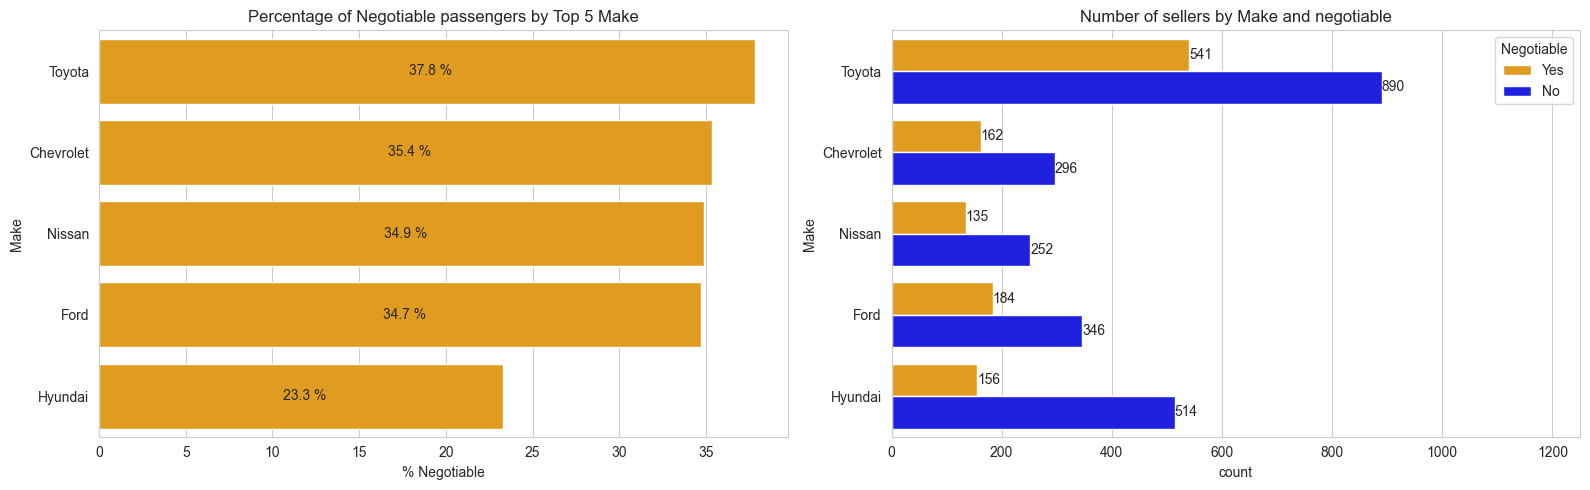

In [16]:
create_plot(df, 'Make', x_maks=1250)

From this data distribution, we can conclude that:
* **Toyota**, despite having the highest percentage of negotiable sellers, also has a considerable number of non-negotiable sellers, indicating that while many Toyota sellers are open to negotiation, a larger number prefer not to negotiate. 
* **Hyundai**, on the other hand, has a much lower percentage of negotiable sellers, suggesting that sellers of Hyundai vehicles are less likely to negotiate compared to those of other makes. 
* The data indicates that the likelihood of negotiation varies by vehicle make, with **Toyota** and **Chevrolet** being more flexible compared to **Hyundai**.

**According to `Gear_Type`**

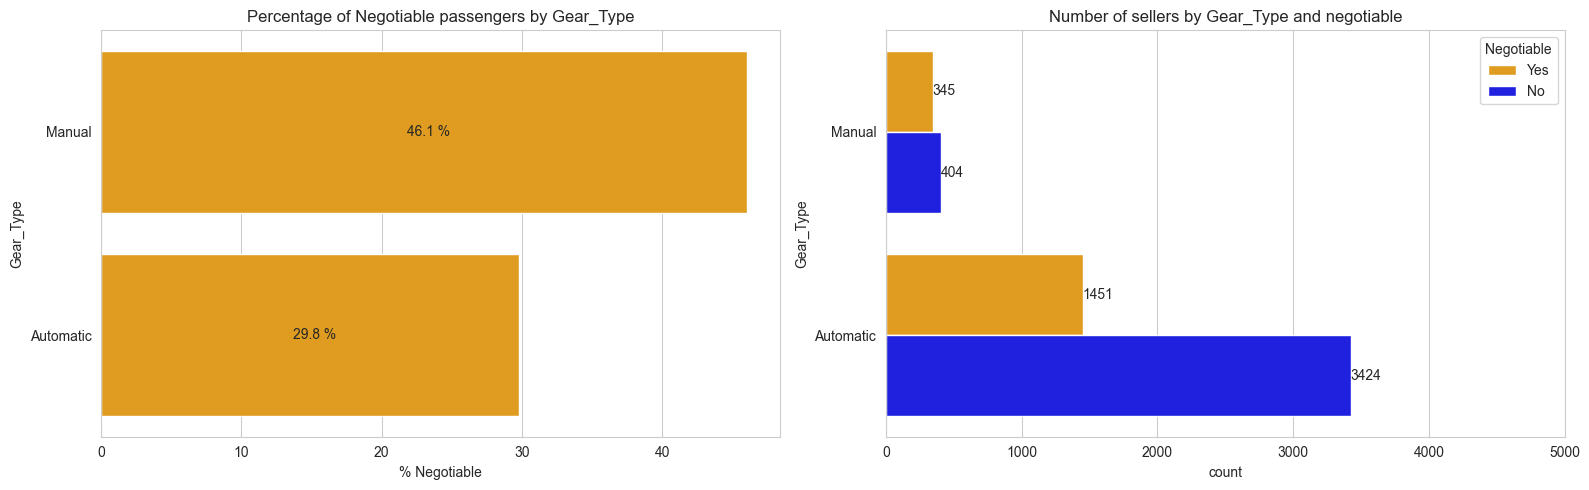

In [17]:
create_plot(df, 'Gear_Type', x_maks=5000)

From this data distribution, we can conclude that:
* Sellers of **Manual** vehicles are generally **more willing to negotiate** compared to sellers of **Automatic** vehicles. 
* However, automatic vehicles dominate the market in terms of the number of sellers, but with a higher tendency towards non-negotiability. 
* This information could be useful for buyers who are looking for negotiation opportunities, as they might find more flexibility with sellers of manual vehicles.

**According to `Origin`**

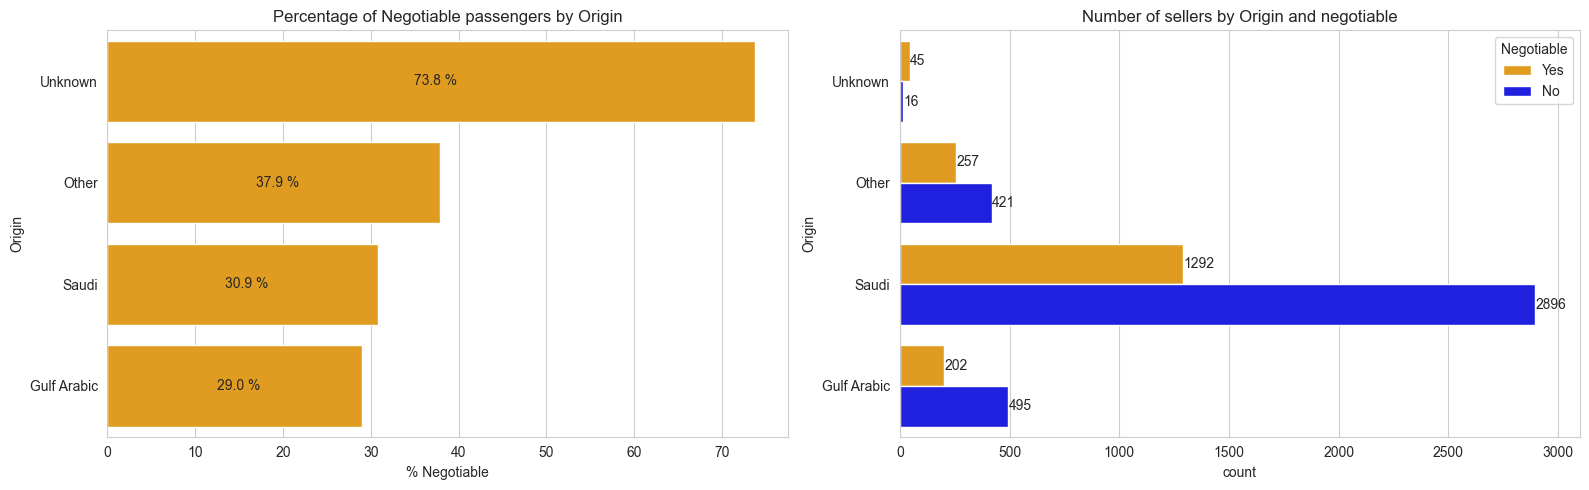

In [18]:
create_plot(df, 'Origin', x_maks=3100)

From this data distribution, we can conclude that:
* Sellers of vehicles with an **Unknown** origin are the **most likely to negotiate**, whereas **Gulf Arabic** and **Saudi** vehicles, despite having a larger number of sellers, tend to be **less negotiable** overall. 
* This suggests that buyers looking for negotiable deals might find more flexibility with vehicles of Unknown or Other origins, whereas those dealing with Saudi or Gulf Arabic vehicles might encounter more fixed pricing.

**According to `Options`**

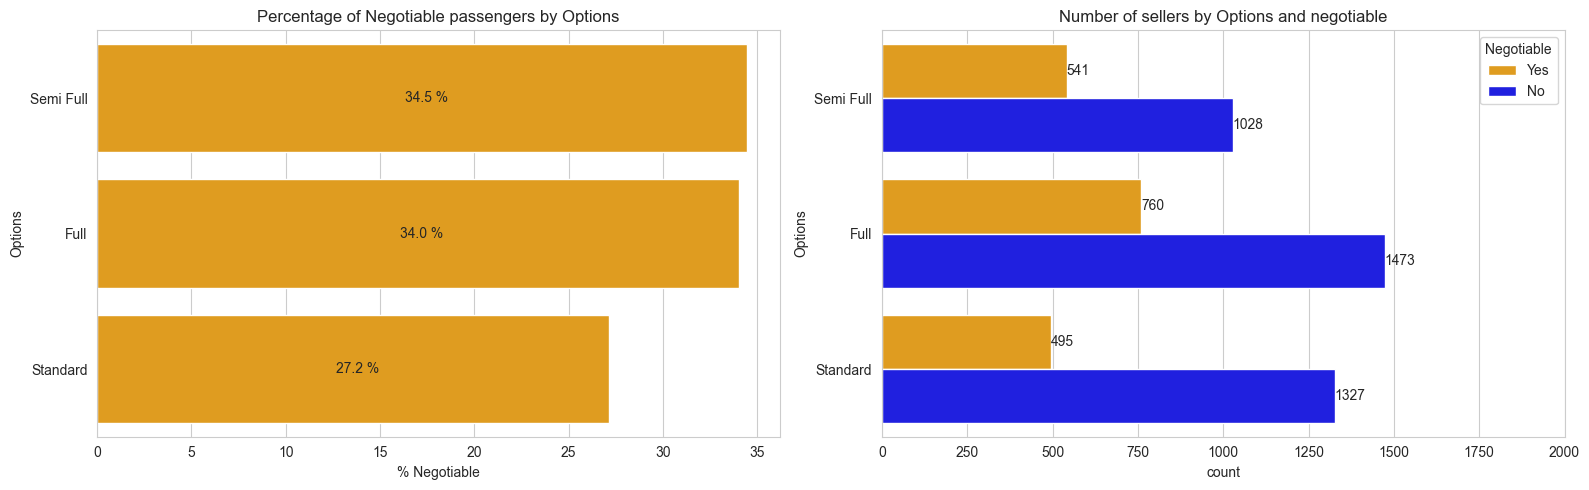

In [19]:
create_plot(df, 'Options', x_maks=2000)

From this data distribution, we can conclude that:
* Sellers of vehicles with **Semi Full** and **Full** options are more likely to be open to negotiation compared to those offering **Standard** options. 
* However, despite the similar negotiability percentages between Semi Full and Full options, Full-option vehicles have a much larger total number of sellers, which might offer more opportunities for negotiation simply due to the higher volume of sellers. 
* Standard options are associated with a lower likelihood of negotiation, which suggests that buyers may find it more challenging to negotiate prices on these vehicles.


## **Data Cleaning, Feature Selection, and Feature Engineering**

Data cleaning is a crucial step to improve and enhance the accuracy of machine learning models. It involves preparing raw data for further analysis. The cleaning is only consists of **Duplicate Value Handling**, **Outlier Handling**, and **Remove Irrelevant Features** (Feature Selection and Feature Engineering).

### **Missing Values**

In [20]:
pd.DataFrame({'null': [df[col].isna().sum() for col in df.columns]}, index=df.columns.values)

,null
Type,0
Region,0
Make,0
Gear_Type,0
Origin,0
Options,0
Year,0
Engine_Size,0
Mileage,0
Negotiable,0


There are no Missing Values in this data

### **Check Duplicate**

In [21]:
# Check Duplicates
display(df[df.duplicated()])
print(f'Number of Duplicates: {sum(df.duplicated())}')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,No,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,No,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,No,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,Yes,0


Number of Duplicates: 4


Duplicate data will be deleted as it can negatively impact the quality of data analysis and the performance of machine learning models.

In [22]:
# Drop Duplicates
df.drop_duplicates()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,Yes,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,No,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,No,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,No,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,No,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,Yes,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,No,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,No,154000


### **Outlier Handling**

Outlier is a data point that significantly differs from other observations in a dataset. Identifying and handling outliers is an important aspect of data analysis because they can have a substantial impact on statistical analyses and machine learning models. 

#### **`Year` Handling**

In [23]:
df_year_count=df['Year'].value_counts().reset_index()
df_year_count

,Year,count
0,2016,847
1,2017,566
2,2015,554
3,2018,528
4,2019,445
5,2014,403
6,2020,382
7,2013,345
8,2012,203
9,2011,191


From this Dataframe, we can conclude that:
* Used cars that are manufactured in the 90's only sold numbers of used cars, with a maximum of 29 sold cars
* Used cars that are manufactured in year 2000 to 2021 sold 20 to 800 cars, significantly much higher sold than the year of 90's
* Latest cars, that are manufactured in year 2022 only sold two used cars

Because we don't know the exact date of the used cars sold to the customer, it is safe to assume that:
* The data of 2022 is not completed, or
* The data of 2022 is completed, but it is also an extreme outlier since the trend of cars sold suddenly and drastically dropped 

Either way, it would be wise if we drop the data from 2022.

Since we knew from Data Distribution Cars sold trend started to increase at cars with a manufacturing year of 2000. Therefore, lets handle the data which cars that are **sold less than year 2000** and the cars that are sold **more than year 2021**.

In [24]:
# Drop Year < 2000 and Year > 2021
df=df[(df['Year']>=2000) & (df['Year']<=2021)]

#### **`Price` Handling**

Looking at the Data Distribution above, the `Price` column has the value of 0 total of 25%, which is the value of the negotiation. We are going to use Regression Analysis model to predict price of car sold, data that have a value price that is **equal to 0 will be dropped**.

We also have to consider that `Price` is very skewed to the right, so there must be another cleaning to do besides the negotiation value. Therefore we can suggest this question:

**What is the *most cheapest* and *most expensive* used car sold in Saudi Arabia?**

To answer this question, we just have to conduct a little research for reference. [Here](https://ksa.hatla2ee.com/en/car) is the data from another site. If we browse the used cars section  (at the time, 19/08/2024), we will get a car with a lowest price of **1.233 Riyal** (Geely Cool Ray 2024) and a highest price of **1.050.000 Riyal** (Land Rover Range Rover 2024). 

Since we often found the lower prices between **5.000 to 7.000 Riyal**, and highest price **160.000 to 250.000 Riyal**: 
* The **lower threshold** will be determined from **5 times of the lowest price** (1.233 times 5), while 
* The **higher threshold** will be **highest price divided by 5** (1.050.000 divided by 5)

In [25]:
# Drop Price < lower threshold and Price > higher threshold
df=df[(df['Price']>=6165) & (df['Price']<=210000)]

#### **`Mileage` Handling**

According to Data Distribution, `Mileage` has a very skewed right distribution with extreme outlier by value of 20000000, that is clearly needs to be dropped. But we also need to check the lower and higher threshold using the [reference](https://ksa.hatla2ee.com/en/car) earlier.

According to reference (at the time, 19/08/2024), **0** mileage is possible , it has a maximum mileage of **3.870.000 km**. while the average annual car mileage in Saudi Arabia is **20.000 km**. Because in the reference, nothing else comes close to the maximum mileage, therefore and higher threshold will be set to calculation of average mileage instead of maximum mileage:
* The **lower threshold** will be determined from **0**, and
* The **higher threshold** will instead be **50 times of the average** (20.000 times 50, in order to reach number that is lower than maximum mileage, but also reaching the supposedly +2 standard deviation)

In [26]:
# Drop Mileage > 1000000
df=df[df['Mileage']<=1000000]

#### **`Make` Handling**

Since `Make` column is categorical, it would be better if we categorize the smaller agreggate into the same category. But first lets see the distribution of `Make`. 

In [27]:
# Calculate the value counts for each make
df_make_count=df['Make'].value_counts()
df_make_count

Make
Toyota          812
Hyundai         490
Ford            332
Chevrolet       280
Nissan          235
Kia             178
GMC             158
Mercedes        114
Lexus           113
Mazda           91 
Honda           85 
Mitsubishi      70 
Dodge           64 
BMW             52 
Jeep            38 
Chrysler        36 
Genesis         27 
Renault         25 
Land Rover      24 
Changan         24 
Audi            24 
Cadillac        21 
Geely           19 
Volkswagen      16 
MG              15 
Porsche         12 
Isuzu           12 
Suzuki          10 
INFINITI        10 
HAVAL           9  
Lincoln         9  
Jaguar          8  
Peugeot         7  
Mercury         7  
MINI            7  
Fiat            6  
FAW             3  
Daihatsu        3  
GAC             3  
Zhengzhou       2  
Maserati        2  
Foton           2  
Hummer          2  
BYD             1  
Victory Auto    1  
Aston Martin    1  
Bentley         1  
Other           1  
Lifan           1  
Chery          

There are 53 unique categories in the `Make` column, with half of them (27 unique categories) having a count of 10 or less. That is why we are going to set threshold into equal or less to 10 and group them into "Other".

In [28]:
# Threshold is equal or less than 10
small_makes=df_make_count[df_make_count<=10].index

# Replace these small makes with 'Others'
df['Make']=df['Make'].apply(lambda x: 'Others' if x in small_makes else x)

new_make_counts=df['Make'].value_counts()
new_make_counts

Make
Toyota        812
Hyundai       490
Ford          332
Chevrolet     280
Nissan        235
Kia           178
GMC           158
Mercedes      114
Lexus         113
Others        100
Mazda         91 
Honda         85 
Mitsubishi    70 
Dodge         64 
BMW           52 
Jeep          38 
Chrysler      36 
Genesis       27 
Renault       25 
Changan       24 
Audi          24 
Land Rover    24 
Cadillac      21 
Geely         19 
Volkswagen    16 
MG            15 
Porsche       12 
Isuzu         12 
Name: count, dtype: int64

### **Remove Irrelevant Features**

Before we remove features that are irrelevant, we need to determine which features that are actually irrelevant to make a Regression Analysis. We need to analyze whether feature columns have effect on the target (`Price`) or not. Although the prime suspect being `Negotiable` and `Region` due to them having either a smaller or bigger unique values. These columns need another checking with hypothesis testing.

In [29]:
# Median Price and Boxplot function for repeated use
def plot_median_price_and_boxplot(df, column_name, price_column='Price', top_n=10):
    top_n_categories = df[column_name].value_counts().nlargest(top_n).index
    filtered_df = df[df[column_name].isin(top_n_categories)]
    median_prices = filtered_df.groupby(column_name)[price_column].median().sort_values(ascending=True)
    filtered_df[column_name] = pd.Categorical(filtered_df[column_name], categories=median_prices.index, ordered=True)
    
    # Subplots
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    
    # Median Price Bar Plot
    median_prices.plot(kind='barh', color='orange', ax=axs[0])
    if column_name in ['Type', 'Region', 'Make']:
        axs[0].set_title(f'Bar Plot of Median Price by Top {top_n} {column_name.title()}s')
    else:
        axs[0].set_title(f'Bar Plot of Median Price by {column_name.title()}')
        
    axs[0].set_xlabel(f'Median {price_column} (in SAR)')
    axs[0].set_ylabel(column_name.title())
    axs[0].grid(True)
    
    # Boxplot of Prices by Top N Categories
    filtered_df.boxplot(column=price_column, by=column_name, grid=False, vert=False, ax=axs[1])
    if column_name in ['Type', 'Region', 'Make']:
        axs[1].set_title(f'Boxplot of {price_column} by Top {top_n} {column_name.title()}s')
    else:
        axs[1].set_title(f'Boxplot of {price_column} by {column_name.title()}')
        
    axs[1].set_xlabel(f'{price_column} (in SAR)')
    axs[1].set_ylabel('')
    
    # Layout
    plt.tight_layout()
    plt.suptitle('') 
    plt.show()

In [30]:
# Scatterplot function for repeated use
def plot_scatter(df, x_column, y_column):

    # Create scatterplot
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_column], df[y_column], alpha=0.5)
    plt.title(f'Scatterplot of {y_column} vs. {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()


#### **`Type` vs `Price`**

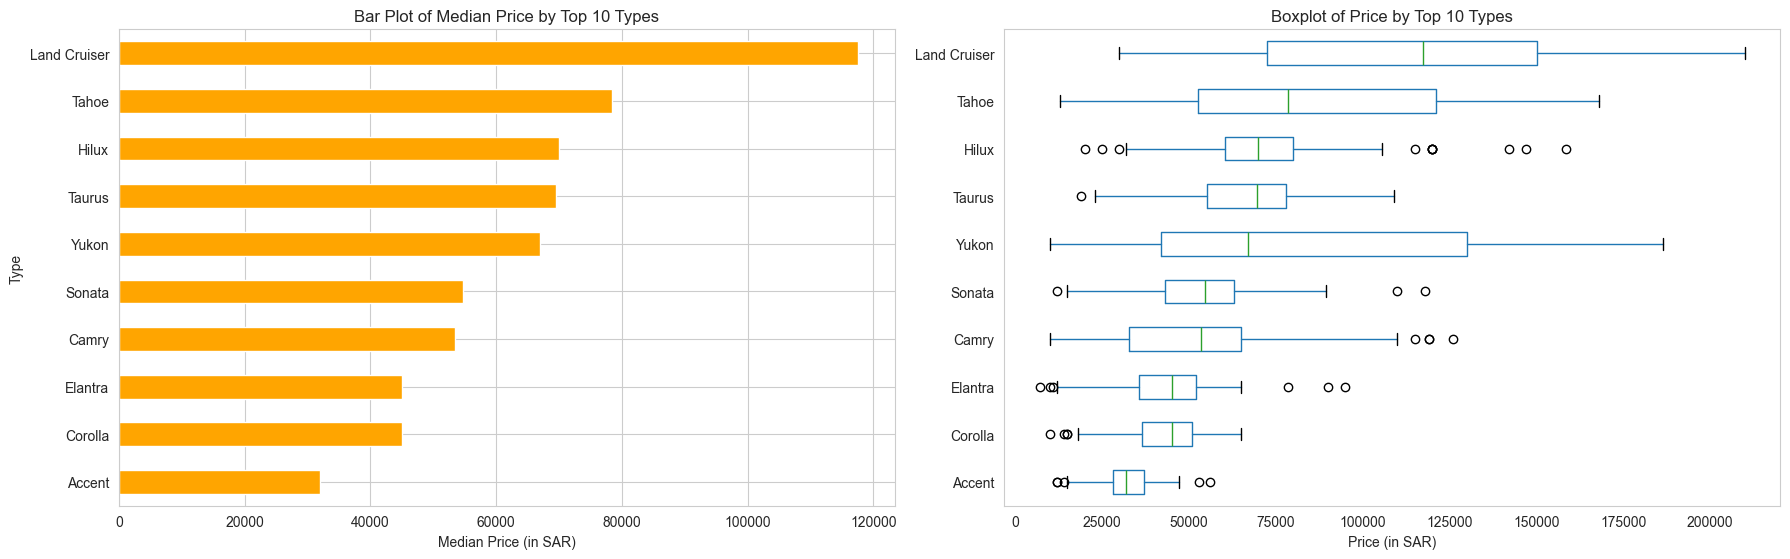

In [31]:
plot_median_price_and_boxplot(df, 'Type')


The combination of bar plot and boxplot between `Type` and `Price` shows that:
* **Land Cruiser**, **Tahoe**, and **Yukon** have a broad range of prices, with several outliers. This suggests that these models can vary greatly in price depending on factors such as age, condition, features, and possibly the market demand.
* Potential buyers should not only consider the typical price (median) but also be aware of the range of prices available for each car type, especially for models with high variability like the **Land Cruiser** or **Tahoe**.

#### **`Make` vs `Price`**

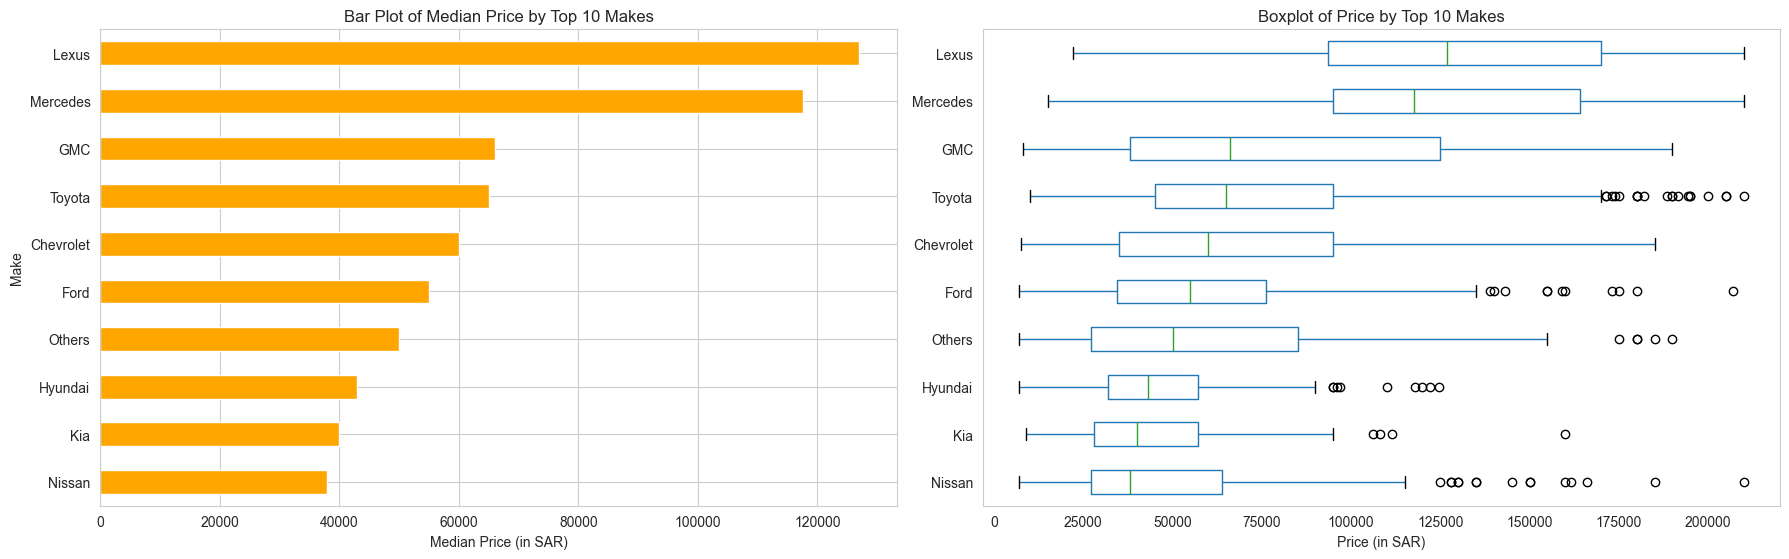

In [32]:
plot_median_price_and_boxplot(df, 'Make')

The combination of bar plot and boxplot between `Make` and `Price` shows that:
* **Land Rover** and **GMC** show higher variability in prices, suggesting a diverse range of models or features within these makes.
* **Hyundai** and **Toyota** exhibit more consistent pricing with fewer outliers, indicating that their vehicles are generally priced within a narrower range.

#### **`Gear_Type` vs `Price`**

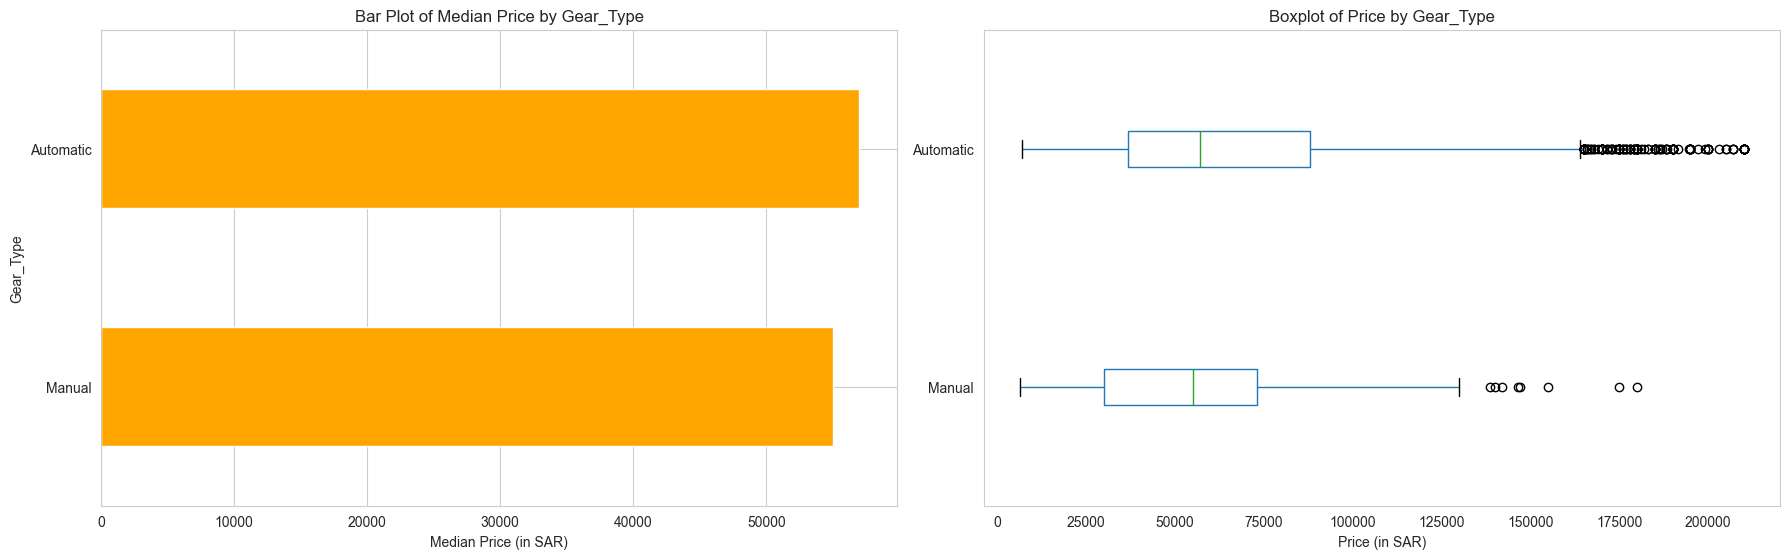

In [33]:
plot_median_price_and_boxplot(df, 'Gear_Type')

The combination of bar plot and boxplot between `Gear_Type` and `Price` shows that:
* Automatic vehicles are generally more expensive than Manual vehicles, as reflected in the higher median price.
* The wider range of prices for Automatic vehicles suggests greater diversity in the models and features available, whereas Manual vehicles tend to have more consistent pricing.

#### **`Options` vs `Price`**

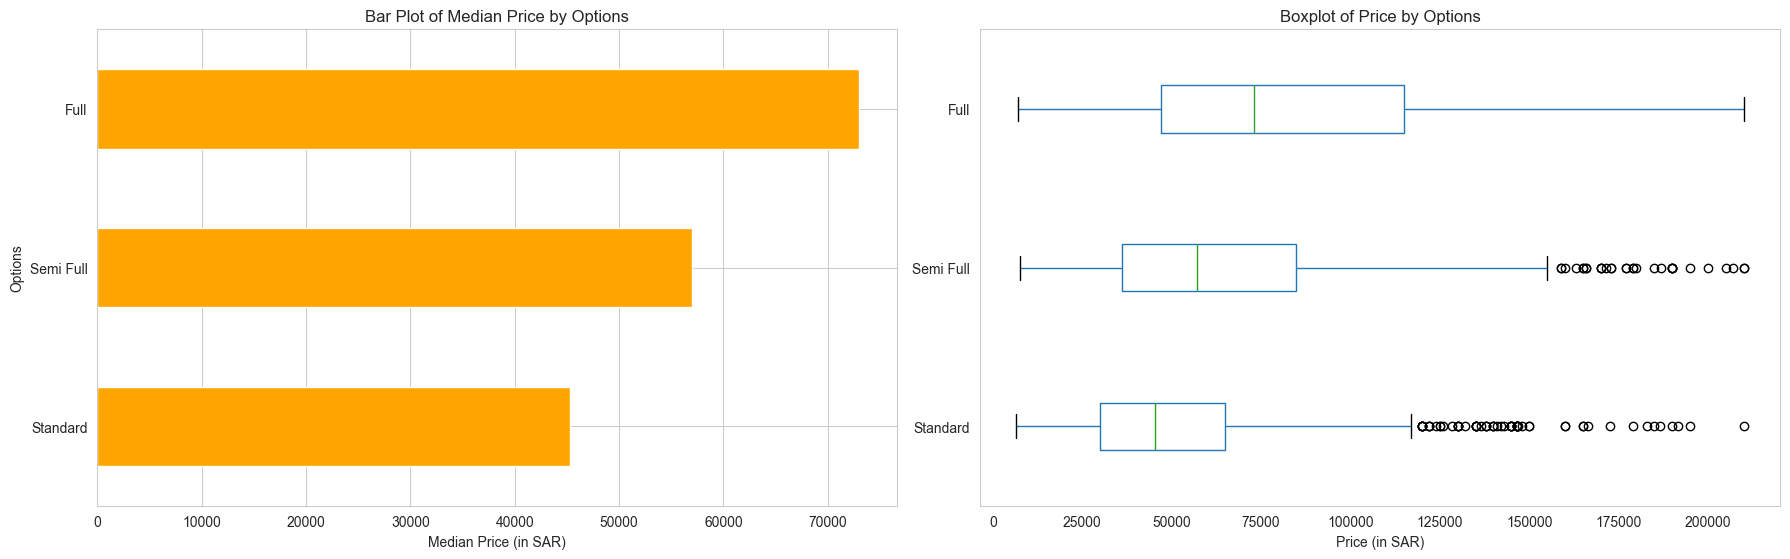

In [34]:
plot_median_price_and_boxplot(df, 'Options')

The combination of bar plot and boxplot between `Options` and `Price` shows that:
* Cars with **Full** options tend to be the most expensive, as reflected by the highest median price and a wide price distribution. Followed by **Semi Full** and **Standard**.
* The outliers in the **Standard** and **Semi Full** categories suggest that certain cars are priced higher than the majority, possibly due to additional factors.
* Buyers looking for fully-equipped vehicles should expect to pay more, but they should also be aware of the price variability within this category.

#### **`Negotiable` vs `Price`**

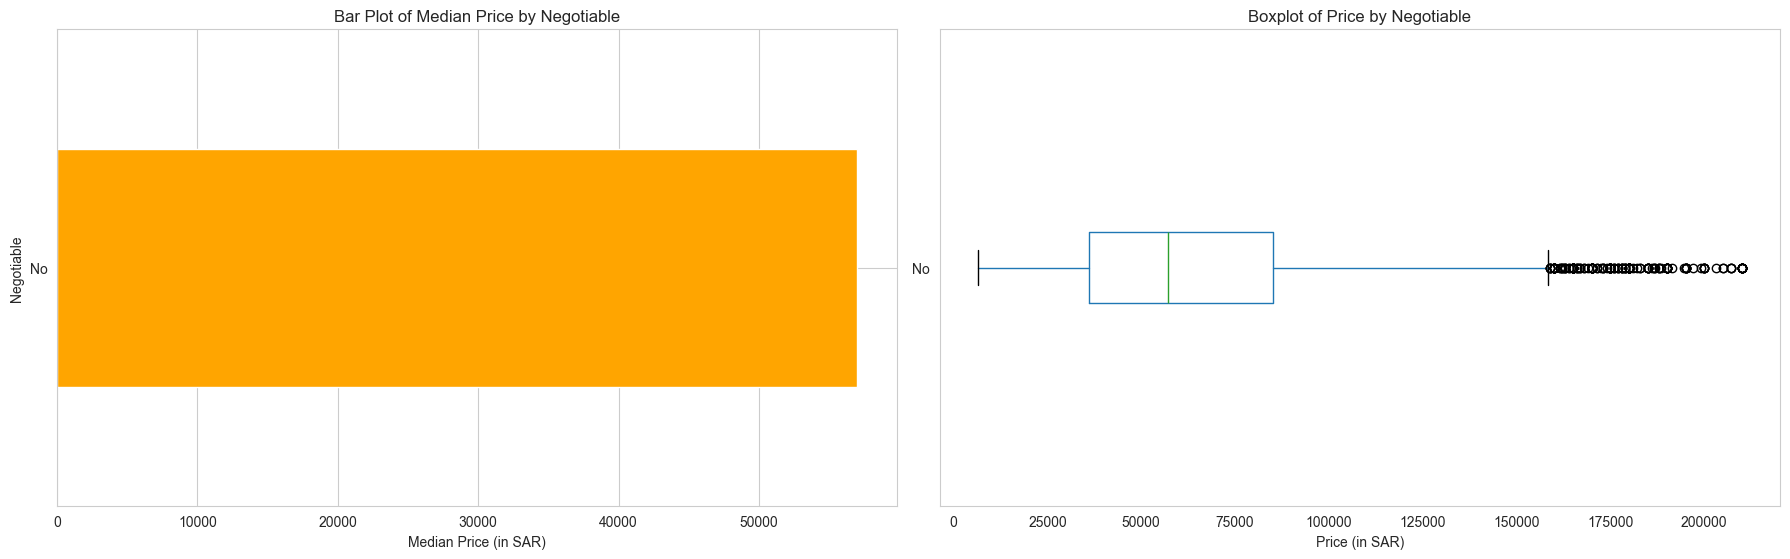

In [35]:
plot_median_price_and_boxplot(df, 'Negotiable')

It is said in the Data Summary itself that `Negotiable` and `Price` are directly related to eachother. So the `Negotiable` column can be safely removed.

#### **`Year` vs `Price`**

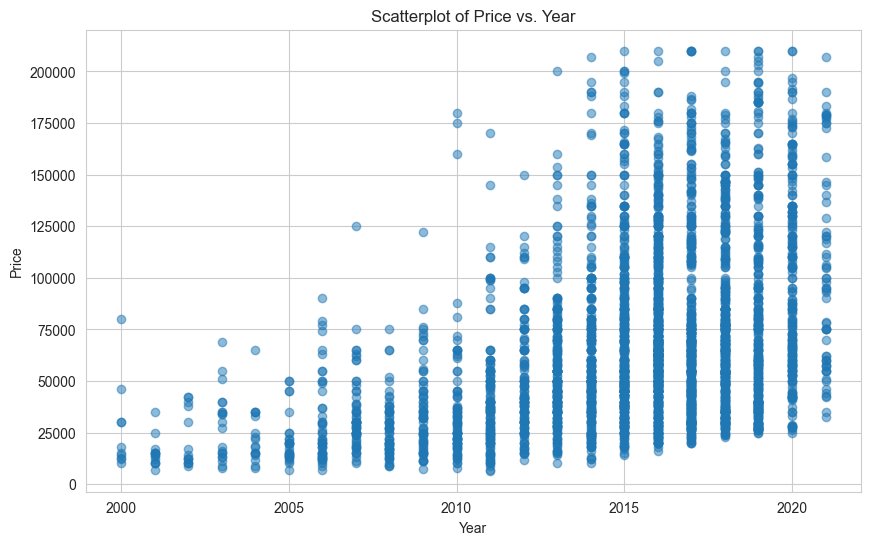

In [36]:
plot_scatter(df, x_column='Year', y_column='Price')

The scatter plot between `Year` and `Price` shows that:
* Relationship between a car's age and its price are expected, where newer cars are typically more expensive.
* The wide spread of prices for recent models indicates significant variability in the market, influenced by another factors.
* The downward trend in prices for older cars is consistent with the natural depreciation of vehicles over time.

#### **`Engine_Size` vs `Price`**

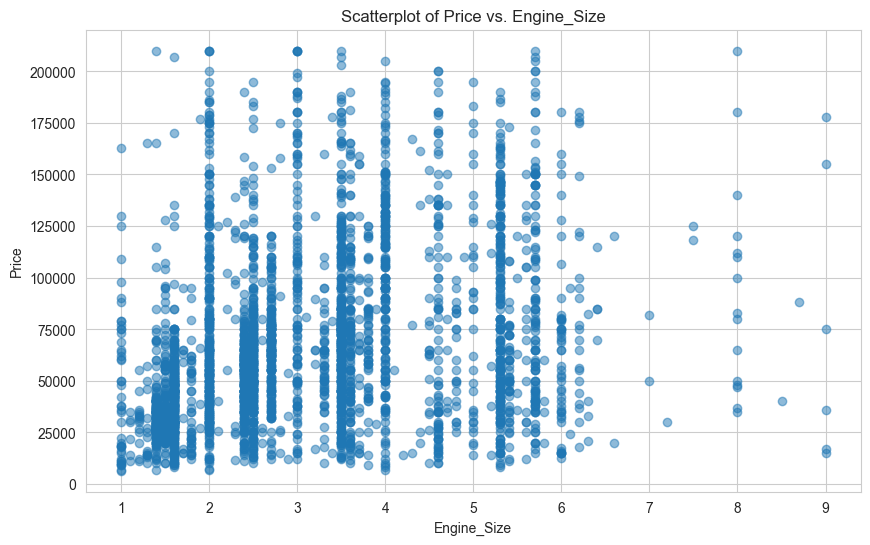

In [37]:
plot_scatter(df, x_column='Engine_Size', y_column='Price')

The scatter plot between `Engine_Size` and `Price` shows that:
* While larger engine sizes tend to be associated with higher prices, the relationship is not straightforward, and there is significant variability in prices even within the same engine size.
* The wide scatter of prices for the same engine sizes suggests that factors other than engine size play significant roles in determining the price of a car.
* The clustering around certain engine sizes indicates that these are popular configurations, but the price variation within these clusters is wide, highlighting the complexity of the used car market.

#### **`Mileage` vs `Price`**

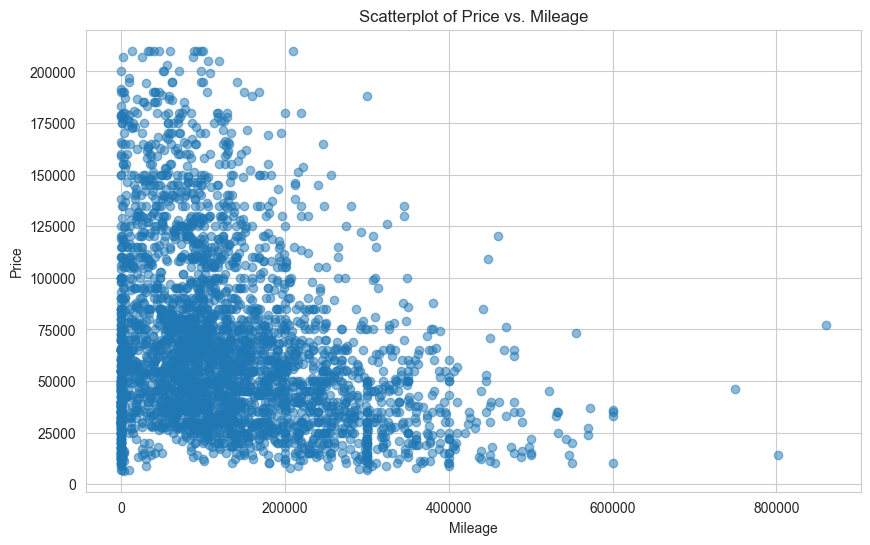

In [38]:
plot_scatter(df, x_column='Mileage', y_column='Price')

The scatter plot between `Mileage` and `Price` shows that:
* As mileage increases, the price tends to decrease, which is expected as higher mileage often indicates more wear and tear on the vehicle. 
* However, there are a few outliers where cars with high mileage still have a relatively high price, which could be due to factors like brand, model, condition, or additional features. 
* The concentration of data points at lower mileage and price ranges suggests that most vehicles in the dataset fall within this range.

#### **`Region` with `Price`**

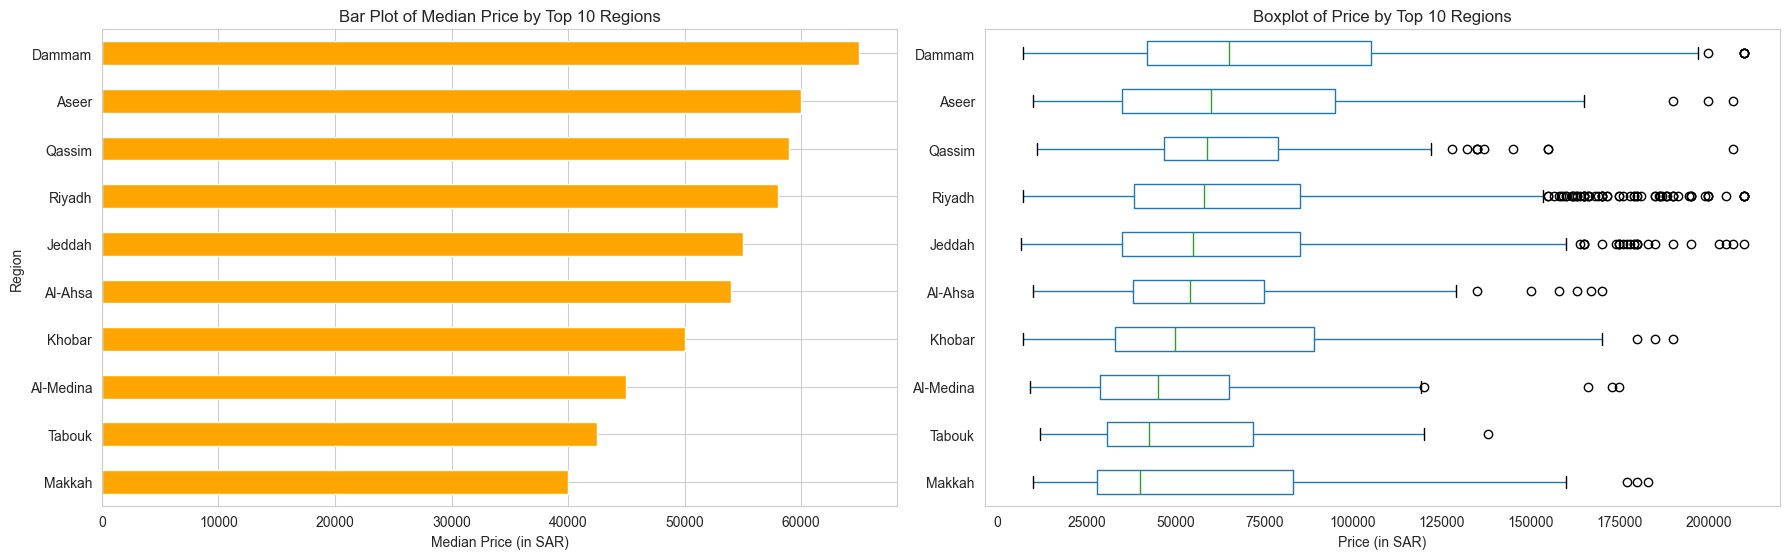

In [39]:
plot_median_price_and_boxplot(df, 'Region')

The combination of bar plot and boxplot between `Region` and `Price` shows that:
* **Dammam** stands out as the region with the highest median car prices, followed by **Aseer** and **Qassim**. This suggests that these areas may have a higher demand for cars or that they have more expensive models available.
* The presence of many outliers in regions like **Riyadh** and **Jeddah** suggests that while the average prices may be moderate, there are many exceptions where cars are significantly more expensive.
* Buyers looking for higher-end cars may find more options in regions like **Riyadh** and **Jeddah**, where the market is more diverse. While sellers in regions like **Dammam** may be able to command higher prices, given the higher median price in that area.

We need to do a hypothesis testing with Kruskal-Willis method to see if `Region` and `Price` have a correlation with eachother.

In [40]:
from scipy.stats import kruskal

# Group the data by region
price_region=[df['Price'][df['Region'] == region] for region in df['Region'].unique()]

# Kruskal-Wallis test (Because it does not distributed normally)
stat, p_value=kruskal(*price_region)

# Display the results
print(f'Kruskal-Wallis test statistic: {stat}')
print(f'P-value: {p_value}')

# Interpretation
if p_value<0.05:
    print('Reject Ho, There is a statistically significant difference in prices across regions.')
else:
    print('Fail to reject Ho, There is NO statistically significant difference in prices across regions.')

Kruskal-Wallis test statistic: 81.67847913878254
P-value: 1.1527407383356897e-07
Reject Ho, There is a statistically significant difference in prices across regions.


Because the null hypothesis has been rejected, we will drop the `Region` column.

#### **`Origin` with `Price`**

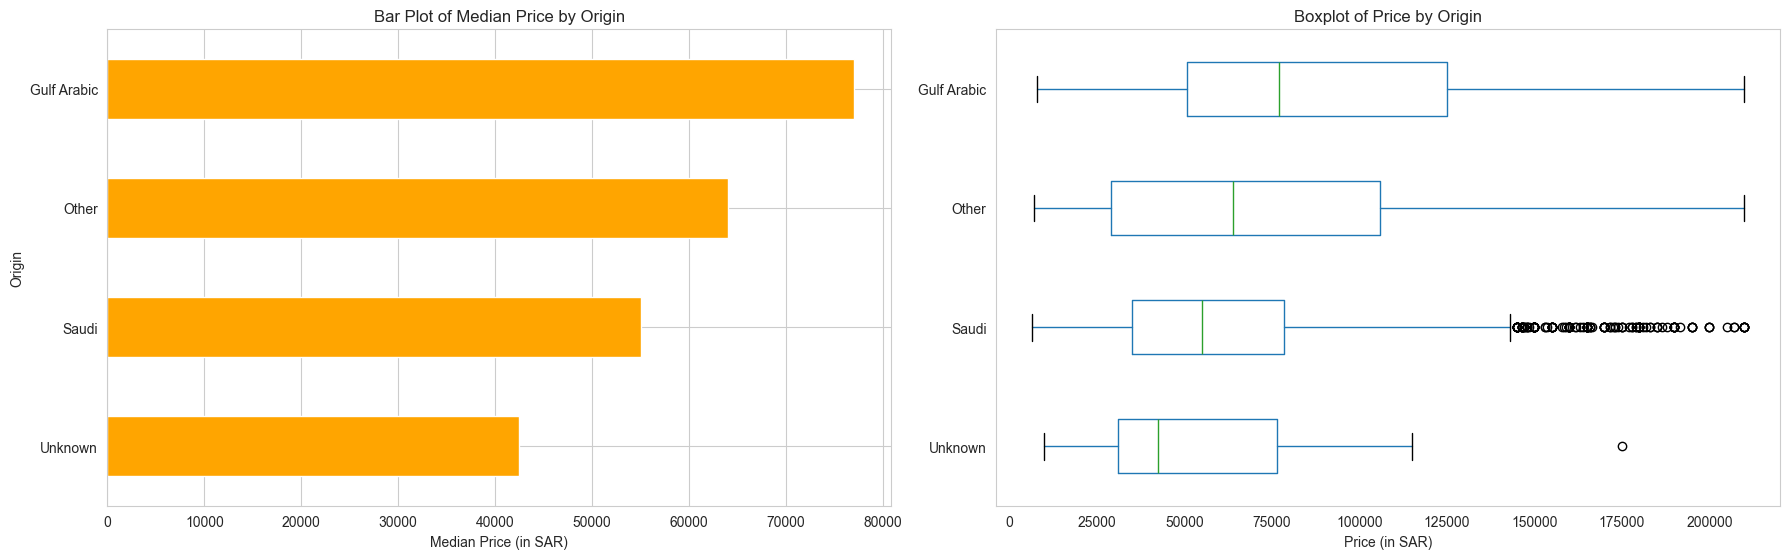

In [41]:
plot_median_price_and_boxplot(df, 'Origin')

The combination of bar plot and boxplot between `Origin` and `Price` shows that:
* Used cars of **Gulf Arabic** origin tend to be **more expensive**, as indicated by the highest median price and a relatively wide price distribution.
* The presence of many outliers in the **Saudi** category suggests that while most cars are priced lower, some cars are significantly more expensive, potentially due other factors.
* For buyers, **Gulf Arabic** and **Other** origin cars may be perceived as premium, commanding higher prices. While sellers might find that pricing consistency is easier to achieve with **Unknown** origin cars, while **Saudi** origin cars may require more careful pricing due to the broad range of values.


#### **Removing Irrelevant Features**

From "vs target" analysis earlier, turns out the column that can be safely removed is `Negotiable` and `Region`.

In [42]:
# Drop Mileage > 1000000
df=df.drop(columns=['Negotiable','Region'])

### **Cleaned Data**

In [43]:
# Data Preprocessing Result
df=df.reset_index().drop(columns='index')
df

,Type,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Yukon,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
1,Optima,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
2,CX3,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
3,Cayenne S,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
4,Sonata,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...
3462,CX9,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
3463,Suburban,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
3464,X-Trail,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
3465,Yukon,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


In [44]:
# Data Saving
# df.to_csv('data_saudi_used_cars_clean.csv')

## **Modelling**

### **Data Preparation**

Preparing the data, we are going to make a model from dataset that has been cleaned. Modelling 

|No.|Action|Technique|Description|
|-|-|-|-|
|1.|Data Splitting|test_size=0.132, random_state=42|Make the split clean: 3000+ data train, 450+ data test.|
|2.|Model Benchmarking|Using 7 different regression model algorithm|To explore different approaches, identify the best-performing model, and ensure that your final model is robust, generalizes well.|
|3.|Encode & Scale|Using ColumnTransformer|Handle datasets with mixed types of data in a concise, organized manner.|
|3a.|`Make`, `Gear_Type`, `Origin`, `Options`|Using OneHotEncoder|These categorical feature has a small number of categories.|
|3b.|`Type`|Using BinaryEncoder|These categorical feature has a large number of categories (High cardinality).|
|3c.|`Year`, `Engine_Size`, `Mileage`|Using RobustScaler|To ensure that numerical features are appropriately scaled as part of a comprehensive preprocessing pipeline.|
|4a.|Cross Validation|Using KFold (n_splits=5, shuffle=True, random_state=42)|Splitting the data into multiple folds and averaging the results.|
|4b.|Estimator|Using Pipeline (MAE & MAPE)|Outlier Handling, Feature Engineering, and Feature Selection are outside the Pipeline model.|
|5.|Hyperparameter Tuning|Using RandomizedSearchCV (Top 3 Model of the lowest MAE)|Optimizing the performance of the model.|




### **Define Features and Target**

In [45]:
# Features
X=df.drop(columns='Price')

# Target
y=df['Price']

### **Data Splitting**

The data have 3467 rows. We are going to split the test size and train size into:
* Clean 3000+ for x_train and y_train
* Clean 450+ for x_test and y_test

In [46]:
X_train, X_test, y_train, y_test=train_test_split(
    X,
    y,
    test_size=0.132,
    random_state=42
)

print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(3009, 8) (3009,)
(458, 8) (458,)


### **Model Benchmarking**

For this case, The benchmarking models that we are going to use:
* Linear Regression
    * Assumes **linear relationship** between input variables and the target.
    * Simple, fast, and provides interpretable results.
* Ridge Regression
    * Type of linear regression that includes **L2 regularization**. Adds a **penalty equal** to the **square** of the magnitude of coefficients.
    * Reduces model complexity and prevents overfitting which might result from simple linear regression.
* Lasso Regression
    * Type of linear regression with **L1 regularization**, Adds a **penalty equal** to the **absolute value** of the magnitude of coefficients.
    * Tends to completely eliminate coefficients for some variables (feature selection). Useful when you have a large number of features.
* K-Nearest Neighbour Regression (KNN)
    * Non-parametric method that predicts the target value by averaging the values of the K nearest neighbors to a point.
    * Simple, intuitive, and capable of capturing non-linear relationships.
* Decision Trees
    * Splits the data into subsets using a tree-like model of decisions. It makes predictions by learning simple decision rules inferred from features.
    * Can model complex relationships; doesn’t require normalization of data.
* Random Forest
    * Ensemble method that builds multiple decision trees and merges them together to get a more accurate and stable prediction.
    * Reduces overfitting in decision trees and improves accuracy. Handles both regression and classification tasks well.
* XGBoost (XGB)
    * Stands for eXtreme Gradient Boosting. It is an implementation of gradient boosted decision trees designed for speed and performance.
    * Highly flexible, allows for customization of the optimization process. Often provides superior predictive accuracy.

These algorithms will be subjected to KFold cross check validation to determine a robust model.

In [47]:
# Model Algorithm
lr=LinearRegression()
ridge=Ridge(random_state=42)
lasso=Lasso(random_state=42)
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor(random_state=42)
rf=RandomForestRegressor(random_state=42)
xgb=XGBRegressor(random_state=42)

# Wrapper for regression models that transforms the target variable for fitting and prediction
log_lr=TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_ridge=TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
log_lasso=TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
log_knn=TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt=TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf=TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb=TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

models=[log_lr, log_ridge, log_lasso, log_knn, log_dt, log_rf, log_xgb]

In [48]:
# Encode & Scale using ColumnTransformer
transformer=ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['Make', 'Gear_Type','Origin', 'Options']),
    ('Binary', ce.BinaryEncoder(), ['Type']),
    ('scale', RobustScaler(), ['Year','Engine_Size', 'Mileage'])
])

In [49]:
# Evaluation metric
mean_mape=[]
mean_mae=[]
stdv_mape=[]
stdv_mae=[]    
for i in models:
    crossval=KFold(n_splits=5, shuffle=True, random_state=101)
    estimator=Pipeline([
        ('preprocess', transformer),
        ('model', i)
    ])

    # MAE
    model_cv_mae=cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    mean_mae.append(model_cv_mae.mean())
    stdv_mae.append(model_cv_mae.std())   

    # MAPE
    model_cv_mape=cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    mean_mape.append(model_cv_mape.mean())
    stdv_mape.append(model_cv_mape.std())

In [50]:
df_eval=pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regressor', 'Lasso Regressor', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_MAE': mean_mae,
    'stdv_MAE': stdv_mae,
    'Mean_MAPE': mean_mape,
    'stdv_MAPE':stdv_mape,
})
df_eval

,Model,Mean_MAE,stdv_MAE,Mean_MAPE,stdv_MAPE
0,Linear Regression,-15818.588819,606.379898,-0.269899,0.009928
1,Ridge Regressor,-15793.668698,583.630470,-0.269504,0.010098
2,Lasso Regressor,-31341.777436,820.206614,-0.612646,0.035376
3,KNN Regressor,-14939.654580,851.099536,-0.277559,0.011201
4,DecisionTree Regressor,-15994.062968,985.511298,-0.282149,0.017389
5,RandomForest Regressor,-12095.211311,925.710225,-0.200282,0.010282
6,XGBoost Regressor,-11125.216707,780.817022,-0.188378,0.008958


From this dataframe, **Standard Deviation of MAE** suggest that model's performance varies significantly across different subsets. This can indicate issues like **model overfitting**, where the model performs well on some subsets but poorly on others. 

But, this dataframe's **Standard Deviation of MAPE** the percentage errors relative to the actual values are consistent across different data splits. This consistency is a good sign, especially in applications where predictions need to be reliable. These models can still be used for target (price) prediction.

If we look at **Mean MAE**: **Model XGB**, **Random Forest**, and **KNN Regressor** are picked for top 3 . We are going to use these 3 models for hyperparameter tuning.

In [51]:
# Test Model

score_mae=[]
score_mape=[]

# Test set Prediction
for i in [xgb,rf,knn]:

    model=Pipeline([
        ('preprocessing', transformer),
        ('model', i)
        ])

    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

test_eval=pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape}, index=['XGB Regressor','RandomForest Regressor','KNN Regressor'])
test_eval

,MAE,MAPE
XGB Regressor,10503.062366,0.189346
RandomForest Regressor,11378.179334,0.210312
KNN Regressor,14245.035808,0.281179


This is an evaluation before hyperparameter tuning. As you can see that all of the MAE scores obtained is high, but we can still lower the score by improving the model with hyperparameter tuning.  

### **Hyperparameter Tuning**

Hyperparameter Tuning involves finding the best combination of hyperparameters to optimize the performance of the model, ensuring it generalizes well to new data. We are going to tune each models: XGB Regressor, RandomForest Regressor, and K-NearestNeighbour Regressor

#### **Model 1: XGBoost Regressor**

We will perform hyperparameter tuning on the XGBoost model in the hope of improving the model's performance.

In [52]:
# Hyperparameter space XGboost
hyperparam_space_xgb={
    'model__learning_rate': [0.01, 0.02, 0.05],
    'model__max_depth': [4, 5, 6],
    'model__n_estimators': [150, 200, 300],
    'model__subsample': [0.8, 0.9],
    'model__colsample_bytree': [0.8, 0.9],
    'model__reg_alpha': [0.1, 0.5, 1],
    'model__reg_lambda': [1, 2],
    'model__min_child_weight': [3, 5],
    'model__gamma': [0.2, 0.3]
}

In [53]:
# Creating algorithm chains
estimator_xgb=Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

# Cross Validation using KFold
crossval=KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_xgb=RandomizedSearchCV(
    estimator_xgb, 
    param_distributions=hyperparam_space_xgb,
    n_iter=50,                       # Adjust as needed
    cv=crossval, 
    scoring=['neg_mean_absolute_error'], 
    n_jobs=-1,
    refit='neg_mean_absolute_error', # Optimization based on MAE
    random_state = 42  
)

In [54]:
# Fitting data to find the best model
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['Make',
                                                                                'Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type']),
                                                                              ('scale',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'Engine_Size',
                                                                                'Mileage'])])),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           bo...
                   param_distributions={'model__colsample_bytree': [0.8, 0.9],
                                        'model__gamma': [0.2, 0.3],
                                        'model__learning_rate': [0.01, 0.02,
                                                                 0.05],
                                        'model__max_depth': [4, 5, 6],
                                        'model__min_child_weight': [3, 5],
                                        'model__n_estimators': [150, 200, 300],
                                        'model__reg_alpha': [0.1, 0.5, 1],
                                        'model__reg_lambda': [1, 2],
                                        'model__subsample': [0.8, 0.9]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_mean_absolute_error'])

In [55]:
# Checking the Best Score & Parameter
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

Best_score: -10950.436016205696
Best_params: {'model__subsample': 0.8, 'model__reg_lambda': 1, 'model__reg_alpha': 0.1, 'model__n_estimators': 300, 'model__min_child_weight': 3, 'model__max_depth': 5, 'model__learning_rate': 0.05, 'model__gamma': 0.3, 'model__colsample_bytree': 0.9}


Best Parameter for XGB Regressor:
* subsample: 0.8
* reg_lambda: 1
* reg_alpha: 0.1
* n_estimators: 300
* min_child_weight: 3
* max_depth: 5
* learning_rate: 0.05
* gamma: 0.3
* colsample_bytree: 0.9

In [56]:
# Define model based on best estimator
xgb_tuning=random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning=xgb_tuning.predict(X_test)

# Save RMSE, MAE & MAPE metrics values after tuning
mae_xgb_tuning=mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning=mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
xgb_after_tuning=pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=['XGB Regressor'])
xgb_after_tuning

,MAE,MAPE
XGB Regressor,10496.008876,0.184937


#### **Model 2: RandomForest Regressor**

In [57]:
# Creating algorithm chains
estimator_rf=Pipeline([
        ('preprocessing', transformer),
        ('model', rf)
        ])

# Cross Validation using KFold
crossval=KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter RandomForest
hyperparam_randomforest={
    'model__n_estimators': [100, 200, 300, 400, 500],
    'model__max_depth': [None, 10, 20, 30, 40, 50],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__bootstrap': [True, False]
}


In [58]:
# Initialize RandomizedSearchCV
rf_random=RandomizedSearchCV(
    estimator=estimator_rf, 
    param_distributions=hyperparam_randomforest, 
    n_iter=10,  # Adjust as needed
    cv=crossval, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1)

In [59]:
# Fitting data to find the best model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['Make',
                                                                                'Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type']),
                                                                              ('scale',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'Engine_Size',
                                                                                'Mileage'])])),
                                             ('model',
                                              RandomForestRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__max_depth': [None, 10, 20, 30,
                                                             40, 50],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 200, 300,
                                                                400, 500]},
                   random_state=42, verbose=2)

In [60]:
# Checking the Best Score & Parameter
print(f'Best_score: {rf_random.best_score_}')
print(f'Best Parameters: {rf_random.best_params_}')

Best_score: 0.7972484600831676
Best Parameters: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 20, 'model__bootstrap': False}


Best Parameter for RandomForest Regressor:
* n_estimators: 200
* min_samples_split: 2
* min_samples_leaf: 1
* max_features: sqrt
* max_depth: 20
* bootstrap: False

In [61]:
# Define model based on best estimator
rf_tuning=rf_random.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning=rf_tuning.predict(X_test)

# Save RMSE, MAE & MAPE metrics values after tuning
mae_rf_tuning=mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning=mean_absolute_percentage_error(y_test, y_pred_rf_tuning)
rf_after_tuning=pd.DataFrame({'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=['RandomForest Regressor'])
rf_after_tuning

,MAE,MAPE
RandomForest Regressor,10846.32121,0.224561


#### **Model 3: K-NearestNeighbour Regressor**

In [62]:
# Creating algorithm chains
estimator_knn=Pipeline([
        ('preprocessing', transformer),
        ('model', knn)
        ])

# Cross Validation using KFold
crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter KNN
hyperparam_knn={
    'model__n_neighbors': list(range(1, 31)),
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'minkowski'],
    'model__p': [1, 2] 
}

In [63]:
# Initialize RandomizedSearchCV
random_search_knn = RandomizedSearchCV(
    estimator=estimator_knn, 
    param_distributions=hyperparam_knn, 
    n_iter=100,  # Adjust as needed
    cv=crossval, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1)

In [64]:
# Fitting data to find the best model
random_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['Make',
                                                                                'Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type']),
                                                                              ('scale',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'Engine_Size',
                                                                                'Mileage'])])),
                                             ('model', KNeighborsRegressor())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__metric': ['euclidean',
                                                          'manhattan',
                                                          'minkowski'],
                                        'model__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20, 21, 22, 23,
                                                               24, 25, 26, 27,
                                                               28, 29, 30],
                                        'model__p': [1, 2],
                                        'model__weights': ['uniform',
                                                           'distance']},
                   random_state=42, verbose=2)

In [65]:
# Best parameters found
print(f'Best_score: {random_search_knn.best_score_}')
print(f'Best Parameters: {random_search_knn.best_params_}')

Best_score: 0.7241514270202174
Best Parameters: {'model__weights': 'distance', 'model__p': 1, 'model__n_neighbors': 7, 'model__metric': 'euclidean'}


Best Parameter for K-Nearest Neighbour Regressor:
* weights: distance
* p: 1
* n_neighbors: 7
* metric: euclidean

In [66]:
# Define model based on best estimator
knn_tuning=random_search_knn.best_estimator_

# Fitting model
knn_tuning.fit(X_train, y_train)

# Predict test set
y_pred_knn_tuning=knn_tuning.predict(X_test)

# Save RMSE, MAE & MAPE metrics values after tuning
mae_knn_tuning=mean_absolute_error(y_test, y_pred_knn_tuning)
mape_knn_tuning=mean_absolute_percentage_error(y_test, y_pred_knn_tuning)
knn_after_tuning=pd.DataFrame({'MAE': mae_knn_tuning, 'MAPE': mape_knn_tuning}, index=['KNN Regressor'])
knn_after_tuning

,MAE,MAPE
KNN Regressor,13343.925632,0.270808


### **Best Model Algorithm**

After doing hyperparameter tuning, we are going to select best model algorithm between XGB Regressor, RandomForest Regressor and KNN Regressor. 

Below is a model evaluation before tuning:

In [67]:
test_eval

,MAE,MAPE
XGB Regressor,10503.062366,0.189346
RandomForest Regressor,11378.179334,0.210312
KNN Regressor,14245.035808,0.281179


Below is a model evaluation after tuning:

In [68]:
test_eval_tuning=pd.concat([xgb_after_tuning, rf_after_tuning, knn_after_tuning], axis=0)
test_eval_tuning

,MAE,MAPE
XGB Regressor,10496.008876,0.184937
RandomForest Regressor,10846.321210,0.224561
KNN Regressor,13343.925632,0.270808


These models are carefully tuned so that the model is not going to be an overfitting. 
* If we lower the MAE score it will result an overfitting model, but 
* If we tuned the training score and validation score, it will instead increase the MAE score. 

For now, the solution to this situation is to lower MAE score so that it is slightly below the MAE before tuning, and turn the model from truly overfitting to slightly overfitting.

A tuned XGB Regressor model is still having the lowest MAE of 10496.008876, and MAPE of 0.184937. Because of that we are going to use XGB Regressor as a final model.

In [69]:
xgb_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('One Hot', OneHotEncoder(),
                                                  ['Make', 'Gear_Type',
                                                   'Origin', 'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type']),
                                                 ('scale', RobustScaler(),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_...
                              feature_types=None, gamma=0.3, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=300,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=42, ...))])

### **Learning Curve**

Learning curve is a graphical representation that shows how a machine learning model's performance changes as it is trained with increasing amounts of data. In this case, we are going to use MAE score from a tuned XGBoost Regressor model.

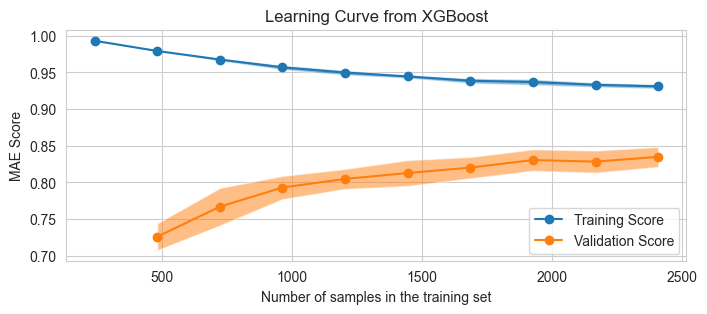

In [70]:
from sklearn.model_selection import LearningCurveDisplay

# Set figure size
fig, ax=plt.subplots(figsize=(8, 3))

# Set the required parameters
common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 10),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "score_name": ['neg_mean_absolute_error']
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(xgb_tuning, **common_params, ax=ax)

# Set title and legend
handles, label=ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='lower right')
ax.set_title(f'Learning Curve from XGBoost')
ax.set_ylabel('MAE Score')

# Show the plot
plt.show()

The learning curves indicate that:
* The gap between the training and validation scores suggests slight overfitting. Although the gap is narrowing, the model is still likely capturing some noise in the training data that does not generalize well to unseen data.
* The model is learning well as more data is added, with both training and validation curves flattening out. This suggests that the model has learned most of what it can from the available data.
* While there is still a gap between the training and validation scores, this is to be expected.

### **Feature Importance**

Feature importance measures the significance of each feature (input variable) in predicting the target variable. It helps identify which features contribute the most to the model's decision-making process and which ones might be less relevant or redundant.

#### **Using Feature Importance Plot**

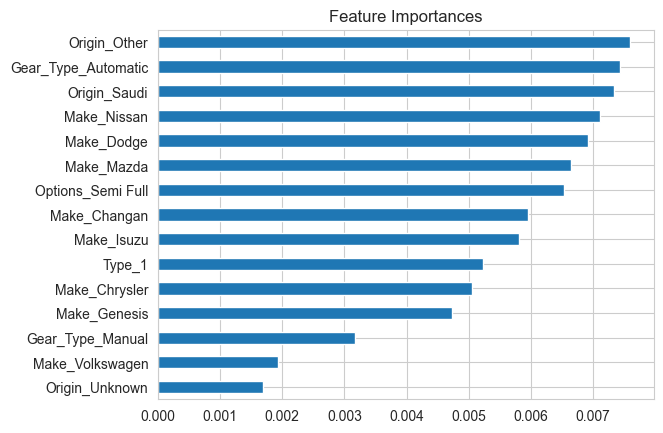

In [71]:
# Check Feature Importance
feature_names=np.concatenate([transformer.transformers_[0][1].get_feature_names_out(),transformer.transformers_[1][1].get_feature_names_out(),transformer.transformers_[2][2]])
feature_imp=pd.Series(xgb_tuning['model'].feature_importances_, feature_names).sort_values(ascending = True).head(15)
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()

In [72]:
feature_names

array(['Make_Audi', 'Make_BMW', 'Make_Cadillac', 'Make_Changan',
       'Make_Chevrolet', 'Make_Chrysler', 'Make_Dodge', 'Make_Ford',
       'Make_GMC', 'Make_Geely', 'Make_Genesis', 'Make_Honda',
       'Make_Hyundai', 'Make_Isuzu', 'Make_Jeep', 'Make_Kia',
       'Make_Land Rover', 'Make_Lexus', 'Make_MG', 'Make_Mazda',
       'Make_Mercedes', 'Make_Mitsubishi', 'Make_Nissan', 'Make_Others',
       'Make_Porsche', 'Make_Renault', 'Make_Toyota', 'Make_Volkswagen',
       'Gear_Type_Automatic', 'Gear_Type_Manual', 'Origin_Gulf Arabic',
       'Origin_Other', 'Origin_Saudi', 'Origin_Unknown', 'Options_Full',
       'Options_Semi Full', 'Options_Standard', 'Type_0', 'Type_1',
       'Type_2', 'Type_3', 'Type_4', 'Type_5', 'Type_6', 'Type_7',
       'Type_8', 'Year', 'Engine_Size', 'Mileage'], dtype=object)

#### **Using Shapley Additive Explanations (SHAP) Values**

In [73]:
xgb_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('One Hot', OneHotEncoder(),
                                                  ['Make', 'Gear_Type',
                                                   'Origin', 'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type']),
                                                 ('scale', RobustScaler(),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_...
                              feature_types=None, gamma=0.3, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=300,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=42, ...))])

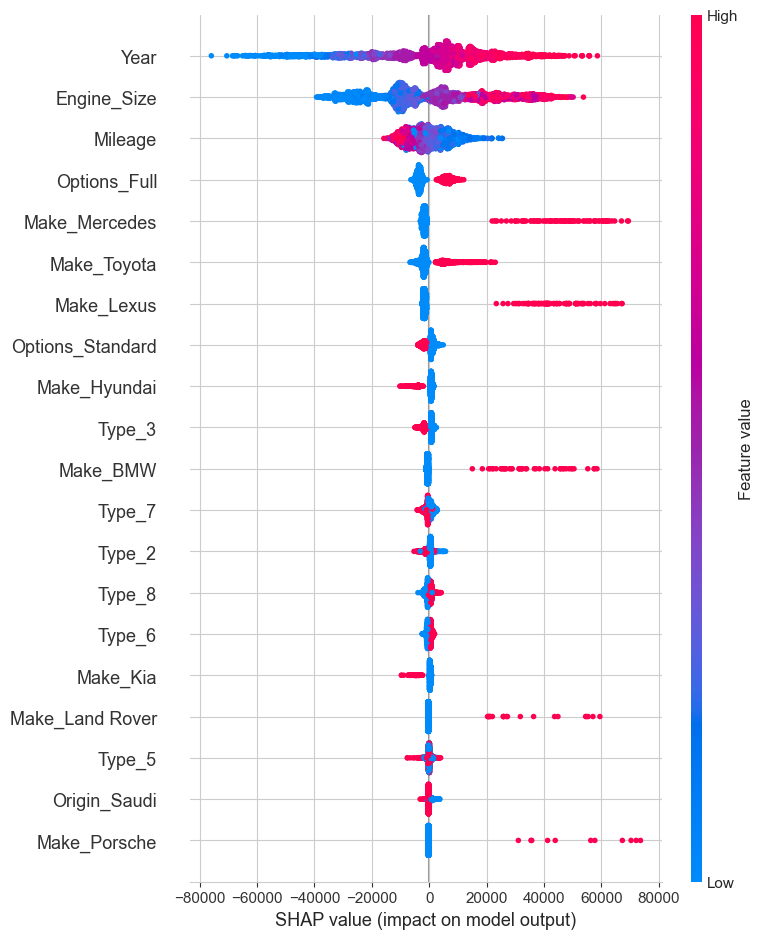

In [74]:
import shap

# Extract the trained model from the pipeline
model=xgb_tuning.named_steps['model']

# Preprocess the data using the pipeline (but without fitting the model again)
X_train_processed=xgb_tuning.named_steps['preprocessing'].transform(X_train)

# Get feature names from each transformer in the ColumnTransformer
preprocessor=xgb_tuning.named_steps['preprocessing']
feature_names=[]

for name, transformer, columns in preprocessor.transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        feature_names.extend(transformer.get_feature_names_out(columns))
    else:
        feature_names.extend(columns)  # If the transformer does not change the feature names

# Create a SHAP explainer
explainer=shap.TreeExplainer(model)

# Compute SHAP values
shap_values=explainer.shap_values(X_train_processed)

# Summarize the SHAP values using SHAP plots
shap.summary_plot(shap_values, X_train_processed, feature_names=feature_names)


SHAP values provide a unified measure of feature importance by calculating the contribution of each feature to every prediction and aggregating these contributions across all predictions.

The summary of SHAP plot are:
* `Year`, `Engine_Size`, and `Mileage` are the most critical features influencing the model's predictions.
* `Options` Full and `Make` Mercedes are also important, with higher values of these features pushing predictions upward.
* `Make` Porsche and `Origin` Saudi have less impact on the predictions, suggesting they might not be as crucial for the model’s decision-making 
process.

Detailed summary of SHAP plot:
* Used cars with latest `Year` manufactures are associated with higher prices. This is make sense because newer vehicles typically have several advantages over older ones, making them more valuable in the market.
* Used cars with higher `Engine_Size` are associated with higher prices. Larger engines typically offer several advantages and features that make them more desirable to certain buyers. 
* Used cars with higher `Mileage` are associated with lower prices. Higher mileage generally indicates that the vehicle has been used more extensively, which can lead to several factors that reduce its market value.

### **Residual Plot**

In [76]:
# Dataframe for Residual Plot after XGB tuning
df_xgb=pd.DataFrame({
    'y_test' : y_test,
    'y_pred' : y_pred_xgb_tuning
})

df_xgb['Residual'] = y_pred_xgb_tuning - y_test
df_xgb

,y_test,y_pred,Residual
1601,83000,69542.898438,-13457.101562
805,109000,107626.968750,-1373.031250
864,28000,28512.828125,512.828125
321,25000,24727.863281,-272.136719
1298,87000,81106.718750,-5893.281250
...,...,...,...
2440,55000,69230.179688,14230.179688
1146,33000,53448.105469,20448.105469
463,73000,72340.203125,-659.796875
2069,39000,37884.656250,-1115.343750


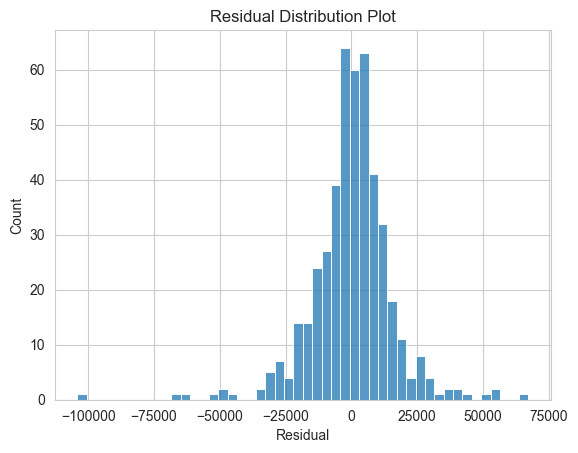

In [77]:
# Residual Distribution Plot
sns.histplot(df_xgb['Residual']).set(title='Residual Distribution Plot')
plt.show()

From residual distribution plot, we can draw conclusion:
* The residual distribution suggests that the model is generally performing well, with most predictions close to the actual values.
* The roughly bell-shaped distribution of the residuals indicates that the normality assumption (common in linear regression) is likely satisfied.
* The residuals on the far ends of the distribution might indicate the presence of outliers or areas where the model could be improved. Meaning that not all items are accurately predicted.


### **Actual vs Predicted Probability**

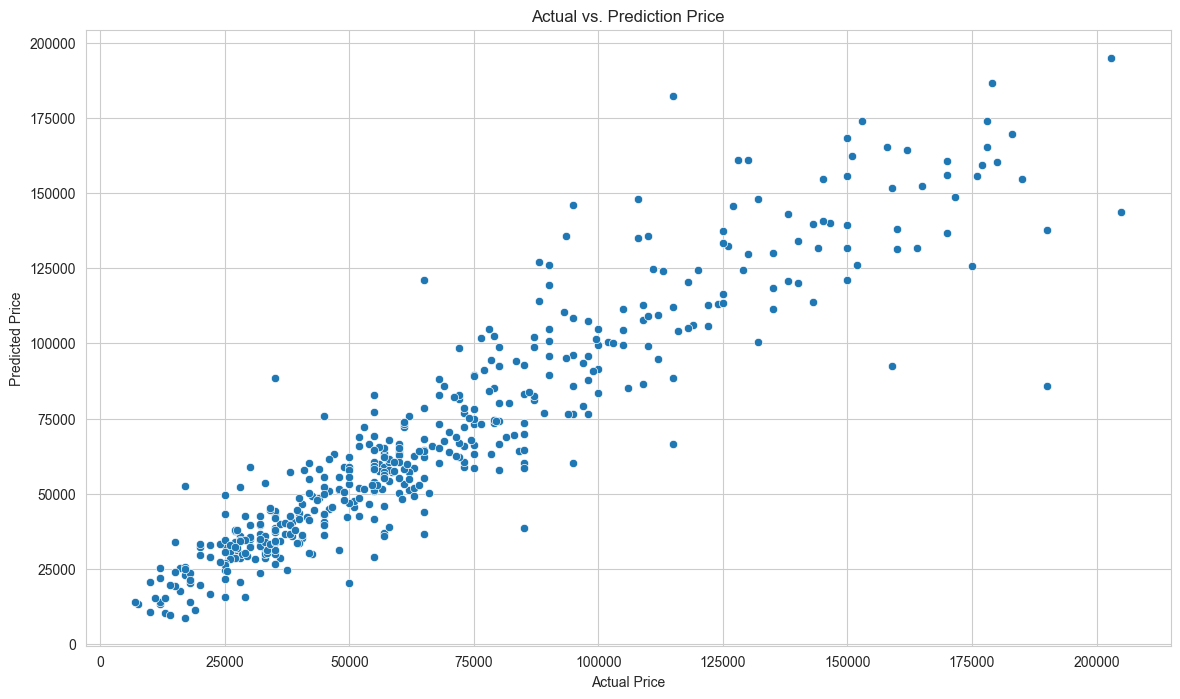

In [78]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')
plt.show()

From Actual vs Prediction Price scatterplot, we can conclude:
* The model appears to perform reasonably well, especially in predicting prices in the lower to middle range. The predictions are not perfect, but the general trend is captured.
* The model struggles more with higher-priced cars, where the spread of predictions is wider. This suggests that the model might benefit from additional features, more data, or different modeling techniques to improve its accuracy for more expensive vehicles.

### **Cost-Benefit Analysis (CBA)**

In [79]:
test_eval_tuning.iloc[:1]

,MAE,MAPE
XGB Regressor,10496.008876,0.184937


This MAE and MAPE value means that the model can be said to miss a prediction by approximately **10.496 SAR**, and in percentage terms the price prediction will miss **18%** of the actual price. This error is actually low since it is a size of the lowest range price of used [cars](https://ksa.hatla2ee.com/en/car/used-prices) (e.g. Toyota Camry 2007, Hyundai Sonata 2007). Which means the current model may not be reliable enough for pricing decisions for potentially higher-value cars.

Even that, this model is still usable for predicting much lower-value cars. Using this model will reduce costs associated with manual pricing efforts, allowing resources to be allocated more efficiently. However, for high-value cars, a more sophisticated model or additional data may be necessary to ensure accurate predictions and avoid potential pricing errors.

### **Model Limitation**

This machine learning model can only be used with several conditions:
* `Year` of manufacture from 2000 to 2021
* `Price` from 6.165 to 210.000 SAR
* `Mileage` lower or equal to 1.000.000 km

## **Conclusion and Recommendation**

### **Conclusion**

From EDA:
* Numerical variables:
    * `Year`: The newer cars (2010-2020) are predominantly sold, with a trend starting from 2000. Older cars sell less frequently.
    * `Engine_Size`: Most sales occurring for cars with engine sizes between 1 to 6, while larger engines (>6) are less common.
    * `Mileage`: Showing that cars with lower mileage are sold more often.
    * `Price`: Most cars priced low but some reaching over 800,000 Riyal.
* Categorical variables:
    * **Land Cruiser**, **Camry**, and **Hilux** are the most common car `Type`, with **Land Cruiser** being the most prevalent.
    * **Toyota** is the dominant car `Make`, followed by **Hyundai** and **Ford**. Toyota models are clearly the most popular among used cars in this dataset.
    * **Riyadh** `Region` has the highest number of listed cars, followed by **Dammam** and **Jeddah**, indicating that these are key markets for used cars.
    * **Automatic** `Gear_Type` are far more common than **Manual**, reflecting a strong preference for automatic cars in the market.
    * The majority of cars are of **Saudi** `Origin`, with a smaller but significant portion from the **Gulf** and other regions.
    * Used cars with **Full** `Options` are the most common, but there is also a substantial number of cars with **Standard** and **Semi Full**.
    * In this market, a majority of car sellers prefer not to negotiate prices, with only about one-third of listings offering negotiable prices.

From Data Analysis (Feature vs Target):
* `Year`: Newer cars generally have higher prices, showing a strong positive correlation between the car's manufacturing year and its price.
* `Engine Size`: Larger engine sizes tend to be associated with higher prices, but there is significant variability, indicating that other factors also play a role.
* `Mileage`: As mileage increases, the price tends to decrease, which is expected as higher mileage often indicates more wear and tear on the vehicle.
* `Options` and `Features`: Cars with **Full** options are the most expensive, followed by **Semi Full** and **Standard** options, with variability in prices within each category.
* `Origin` and `Region`: Car prices vary significantly by region and origin, with some areas like **Dammam** and cars with **Gulf Arabic** origin commanding higher prices.

From Machine Learning model:
* **Regression analysis** was successfully performed with some errors using a machine learning approach.
* Out of the seven algorithms, **XGBoost Regressor** is the best algorithm with the smallest error from both robustness and testing.
* Using the tuned XGBoost Regressor algorithm, the prediction results can be said to miss a prediction by approximately 10.496 SAR, and in percentage terms the price prediction will miss 18% of the actual price.
* According to Feature Importances with SHAP plot, these are features that are worth noting:
    * `Year`, `Engine_Size`, and `Mileage` are the most critical features influencing the model's predictions.
    * `Options` Full and `Make` Mercedes are also important, with higher values of these features pushing predictions upward.
    * `Make` Porsche and `Origin` Saudi have less impact on the predictions, suggesting they might not be as crucial for the model’s decision-making process.
* This machine learning model can only be used with several conditions:
    * `Year` of manufacture from 2000 to 2021
    * `Price` from 6.165 to 210.000 SAR
    * `Mileage` lower or equal to 1.000.000 km


### **Recommendation**

For Machine Learning model:
1. The training and validation scores suggests some overfitting, there are several solution to this problem:
    * We can try a better model as another approach that can help regression analysis. For example, Deep Learning model can be used, but
    * The model might benefit from **additional features** and **more data** from Syarah, to improve its accuracy for more expensive cars. Deep learning models typically require large amounts of labeled data to achieve good performance.
2. The model needs further refinement to improve its accuracy, particularly for predicting higher-priced vehicles. This could involve:
    * Adding more relevant features.
    * Performing better feature engineering.
    * Trying different model architectures or hyperparameter tuning.

For Syarah (as Business):
1. The number of records in the datasets is still relatively small. A larger dataset will lead to more robust and reliable pricing models. The more diverse your data (in terms of regions, car models, and brands), the better your model will perform in different market segments.
1. Incorporating new variables such as:
    * Color,
    * Condition of the Vehicle ("Excellent", "Good", "Fair", "Poor"),
    * Price brackets (Budget, Mid-range, Luxury)
    * Accident History,
    * Service History, or
    * Warranty Availability
    
    These variables could provide a more comprehensive view of the factors influencing car prices and lead to more accurate and market-aligned a right selling price based on the specifications of the car in machine learning model.

1. Consider creating new features by combining existing ones, for example: mileage and age, to create a 'Usage Intensity' or 'Fuel Efficiency' metric. This will help capture more nuanced relationships in the data.

## **Save Model**

In [80]:
# Save model
# import pickle

# with open('Model_Syarah_XGB', 'wb') as file:
    # pickle.dump(model, file)